# MELD Dataset Exploratory Data Analysis for Emotion Recognition
# Sentiment and emotion analysis for customer service chatbot conversations

## 1. Import Required Libraries

In [1]:
gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
  print('Not connected to a GPU')
else:
  print(gpu_info)

Mon Aug  4 13:22:23 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   47C    P8              9W /   70W |       0MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import zipfile
from collections import Counter
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Set style for better visualizations
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

## 2. Download and Extract MELD Dataset

In [4]:
'''
if not os.path.exists('data'):
    os.makedirs('data')
# Download MELD dataset if not already present
meld_url = "http://web.eecs.umich.edu/~mihalcea/downloads/MELD.Raw.tar.gz"
output_path = "data/MELD.Raw.tar.gz"

if not os.path.exists(output_path):
    print("Downloading MELD dataset...")
    wget.download(meld_url, output_path)
    print("\nDownload completed!")
else:
    print("Dataset already downloaded.")

# Extract the dataset
import tarfile
if not os.path.exists('data/MELD.Raw'):
    print("Extracting dataset...")
    with tarfile.open(output_path, 'r:gz') as tar:
        tar.extractall('data/')
    print("Extraction completed!")
'''

'\nif not os.path.exists(\'data\'):\n    os.makedirs(\'data\')\n# Download MELD dataset if not already present\nmeld_url = "http://web.eecs.umich.edu/~mihalcea/downloads/MELD.Raw.tar.gz"\noutput_path = "data/MELD.Raw.tar.gz"\n\nif not os.path.exists(output_path):\n    print("Downloading MELD dataset...")\n    wget.download(meld_url, output_path)\n    print("\nDownload completed!")\nelse:\n    print("Dataset already downloaded.")\n\n# Extract the dataset\nimport tarfile\nif not os.path.exists(\'data/MELD.Raw\'):\n    print("Extracting dataset...")\n    with tarfile.open(output_path, \'r:gz\') as tar:\n        tar.extractall(\'data/\')\n    print("Extraction completed!")\n'

## 3. Load Dataset Files


In [5]:
# Define paths to the CSV files
# Use raw GitHub URLs for direct file access
train_path = 'https://raw.githubusercontent.com/declare-lab/MELD/master/data/MELD/train_sent_emo.csv'
dev_path = 'https://raw.githubusercontent.com/declare-lab/MELD/master/data/MELD/dev_sent_emo.csv'
test_path = 'https://raw.githubusercontent.com/declare-lab/MELD/master/data/MELD/test_sent_emo.csv'

# Load the datasets
print("Loading datasets...")
train_df = pd.read_csv(train_path)
dev_df = pd.read_csv(dev_path)
test_df = pd.read_csv(test_path)

print(f"Train set loaded: {train_df.shape}")
print(f"Dev set loaded: {dev_df.shape}")
print(f"Test set loaded: {test_df.shape}")

Loading datasets...
Train set loaded: (9989, 11)
Dev set loaded: (1109, 11)
Test set loaded: (2610, 11)


## 4. Initial Data Exploration

In [6]:
# Display basic information about the training dataset
print("=== Training Dataset Info ===")
print(train_df.info())
print("\n=== First 5 rows of training data ===")
print(train_df.head())

# Check column names
print("\n=== Column Names ===")
print(train_df.columns.tolist())

=== Training Dataset Info ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9989 entries, 0 to 9988
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Sr No.        9989 non-null   int64 
 1   Utterance     9989 non-null   object
 2   Speaker       9989 non-null   object
 3   Emotion       9989 non-null   object
 4   Sentiment     9989 non-null   object
 5   Dialogue_ID   9989 non-null   int64 
 6   Utterance_ID  9989 non-null   int64 
 7   Season        9989 non-null   int64 
 8   Episode       9989 non-null   int64 
 9   StartTime     9989 non-null   object
 10  EndTime       9989 non-null   object
dtypes: int64(5), object(6)
memory usage: 858.6+ KB
None

=== First 5 rows of training data ===
   Sr No.                                          Utterance          Speaker  \
0       1  also I was the point person on my company’s tr...         Chandler   
1       2                   You must’ve had your hands full

In [7]:
# Display basic information about the training dataset
print("=== Training Dataset Info ===")
print(train_df.info())
print("\n=== First 5 rows of training data ===")
print(train_df.head())

# Check column names
print("\n=== Column Names ===")
print(train_df.columns.tolist())

=== Training Dataset Info ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9989 entries, 0 to 9988
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Sr No.        9989 non-null   int64 
 1   Utterance     9989 non-null   object
 2   Speaker       9989 non-null   object
 3   Emotion       9989 non-null   object
 4   Sentiment     9989 non-null   object
 5   Dialogue_ID   9989 non-null   int64 
 6   Utterance_ID  9989 non-null   int64 
 7   Season        9989 non-null   int64 
 8   Episode       9989 non-null   int64 
 9   StartTime     9989 non-null   object
 10  EndTime       9989 non-null   object
dtypes: int64(5), object(6)
memory usage: 858.6+ KB
None

=== First 5 rows of training data ===
   Sr No.                                          Utterance          Speaker  \
0       1  also I was the point person on my company’s tr...         Chandler   
1       2                   You must’ve had your hands full

## 5. Dataset Statistics

In [8]:
# Combined dataset statistics
total_utterances = len(train_df) + len(dev_df) + len(test_df)
print(f"Total utterances in dataset: {total_utterances}")
print(f"Training set: {len(train_df)} ({len(train_df)/total_utterances*100:.1f}%)")
print(f"Development set: {len(dev_df)} ({len(dev_df)/total_utterances*100:.1f}%)")
print(f"Test set: {len(test_df)} ({len(test_df)/total_utterances*100:.1f}%)")

# Check for missing values
print("\n=== Missing Values in Training Set ===")
print(train_df.isnull().sum())

Total utterances in dataset: 13708
Training set: 9989 (72.9%)
Development set: 1109 (8.1%)
Test set: 2610 (19.0%)

=== Missing Values in Training Set ===
Sr No.          0
Utterance       0
Speaker         0
Emotion         0
Sentiment       0
Dialogue_ID     0
Utterance_ID    0
Season          0
Episode         0
StartTime       0
EndTime         0
dtype: int64


## 6. Emotion Distribution Analysis

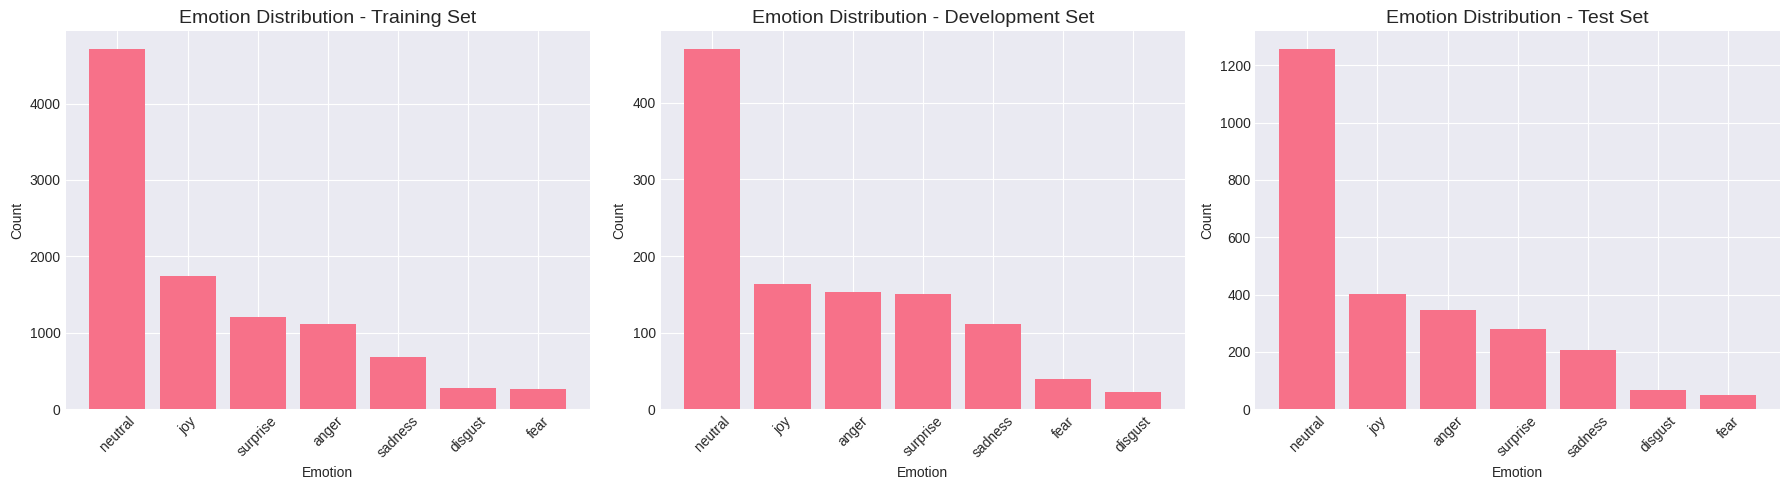

In [9]:
# Analyze emotion distribution across datasets
def plot_emotion_distribution(train_df, dev_df, test_df):
    fig, axes = plt.subplots(1, 3, figsize=(18, 5))

    # Training set
    emotion_counts_train = train_df['Emotion'].value_counts()
    axes[0].bar(emotion_counts_train.index, emotion_counts_train.values)
    axes[0].set_title('Emotion Distribution - Training Set', fontsize=14)
    axes[0].set_xlabel('Emotion')
    axes[0].set_ylabel('Count')
    axes[0].tick_params(axis='x', rotation=45)

    # Dev set
    emotion_counts_dev = dev_df['Emotion'].value_counts()
    axes[1].bar(emotion_counts_dev.index, emotion_counts_dev.values)
    axes[1].set_title('Emotion Distribution - Development Set', fontsize=14)
    axes[1].set_xlabel('Emotion')
    axes[1].set_ylabel('Count')
    axes[1].tick_params(axis='x', rotation=45)

    # Test set
    emotion_counts_test = test_df['Emotion'].value_counts()
    axes[2].bar(emotion_counts_test.index, emotion_counts_test.values)
    axes[2].set_title('Emotion Distribution - Test Set', fontsize=14)
    axes[2].set_xlabel('Emotion')
    axes[2].set_ylabel('Count')
    axes[2].tick_params(axis='x', rotation=45)

    plt.tight_layout()
    plt.show()

plot_emotion_distribution(train_df, dev_df, test_df)

In [10]:
# Overall emotion distribution
all_emotions = pd.concat([train_df['Emotion'], dev_df['Emotion'], test_df['Emotion']])
emotion_dist = all_emotions.value_counts()
print("\n=== Overall Emotion Distribution ===")
print(emotion_dist)
print(f"\nTotal unique emotions: {len(emotion_dist)}")


=== Overall Emotion Distribution ===
Emotion
neutral     6436
joy         2308
surprise    1636
anger       1607
sadness     1002
disgust      361
fear         358
Name: count, dtype: int64

Total unique emotions: 7


## 7. Sentiment Distribution Analysis

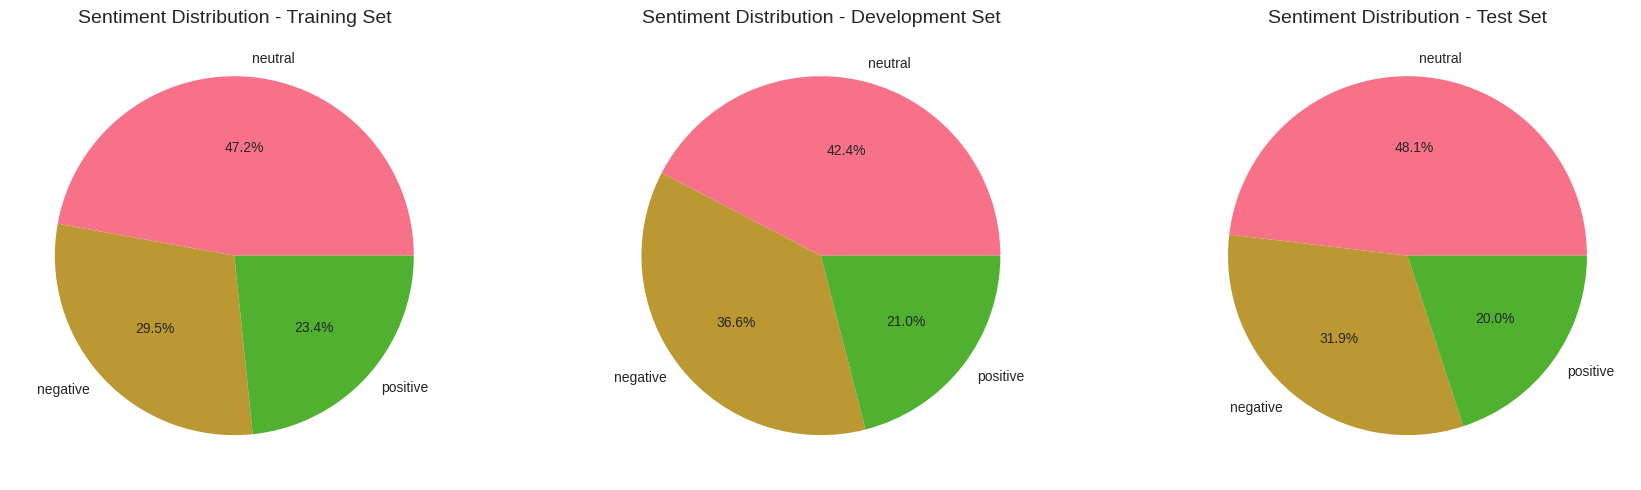

In [11]:
# Analyze sentiment distribution
def plot_sentiment_distribution(train_df, dev_df, test_df):
    fig, axes = plt.subplots(1, 3, figsize=(18, 5))

    datasets = [('Training', train_df), ('Development', dev_df), ('Test', test_df)]

    for idx, (name, df) in enumerate(datasets):
        sentiment_counts = df['Sentiment'].value_counts()
        axes[idx].pie(sentiment_counts.values, labels=sentiment_counts.index, autopct='%1.1f%%')
        axes[idx].set_title(f'Sentiment Distribution - {name} Set', fontsize=14)

    plt.tight_layout()
    plt.show()

plot_sentiment_distribution(train_df, dev_df, test_df)

In [12]:
# Overall sentiment distribution
all_sentiments = pd.concat([train_df['Sentiment'], dev_df['Sentiment'], test_df['Sentiment']])
sentiment_dist = all_sentiments.value_counts()
print("\n=== Overall Sentiment Distribution ===")
print(sentiment_dist)


=== Overall Sentiment Distribution ===
Sentiment
neutral     6436
negative    4184
positive    3088
Name: count, dtype: int64


## 8. Text Length Analysis

In [13]:
# Analyze utterance lengths
train_df['utterance_length'] = train_df['Utterance'].apply(lambda x: len(str(x).split()))
dev_df['utterance_length'] = dev_df['Utterance'].apply(lambda x: len(str(x).split()))
test_df['utterance_length'] = test_df['Utterance'].apply(lambda x: len(str(x).split()))

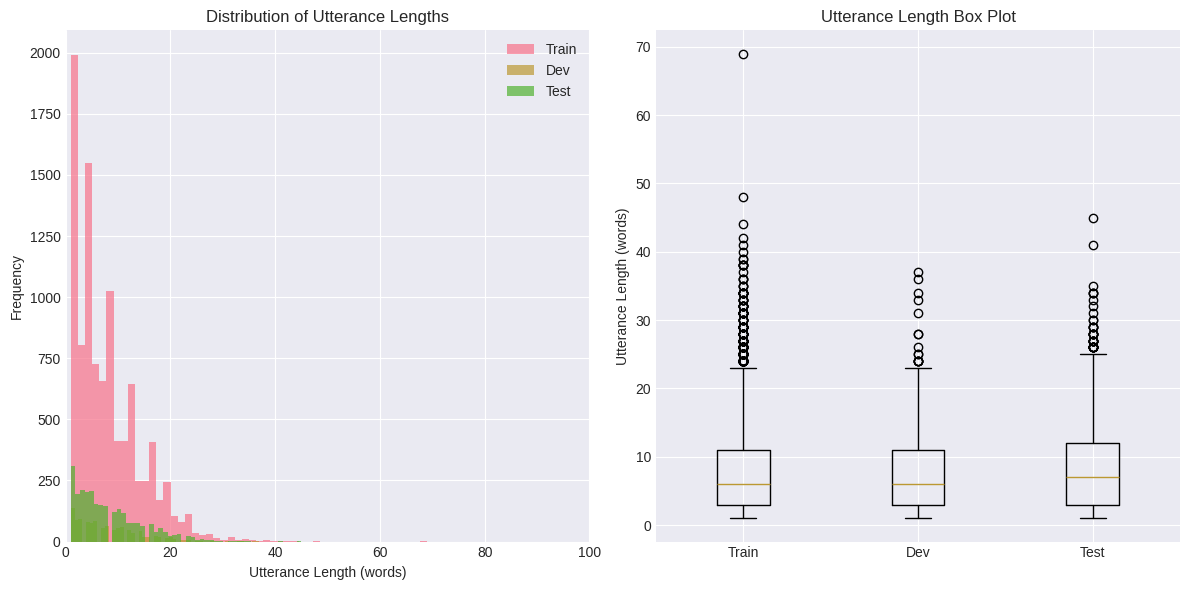

In [14]:
# Plot utterance length distribution
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.hist(train_df['utterance_length'], bins=50, alpha=0.7, label='Train')
plt.hist(dev_df['utterance_length'], bins=50, alpha=0.7, label='Dev')
plt.hist(test_df['utterance_length'], bins=50, alpha=0.7, label='Test')
plt.xlabel('Utterance Length (words)')
plt.ylabel('Frequency')
plt.title('Distribution of Utterance Lengths')
plt.legend()
plt.xlim(0, 100)

plt.subplot(1, 2, 2)
plt.boxplot([train_df['utterance_length'], dev_df['utterance_length'], test_df['utterance_length']],
            labels=['Train', 'Dev', 'Test'])
plt.ylabel('Utterance Length (words)')
plt.title('Utterance Length Box Plot')
plt.tight_layout()
plt.show()

In [15]:
# Statistics
print("=== Utterance Length Statistics ===")
print(f"Training set - Mean: {train_df['utterance_length'].mean():.2f}, Median: {train_df['utterance_length'].median():.0f}, Max: {train_df['utterance_length'].max()}")
print(f"Dev set - Mean: {dev_df['utterance_length'].mean():.2f}, Median: {dev_df['utterance_length'].median():.0f}, Max: {dev_df['utterance_length'].max()}")
print(f"Test set - Mean: {test_df['utterance_length'].mean():.2f}, Median: {test_df['utterance_length'].median():.0f}, Max: {test_df['utterance_length'].max()}")

=== Utterance Length Statistics ===
Training set - Mean: 7.95, Median: 6, Max: 69
Dev set - Mean: 7.91, Median: 6, Max: 37
Test set - Mean: 8.21, Median: 7, Max: 45


## 9. Speaker Analysis

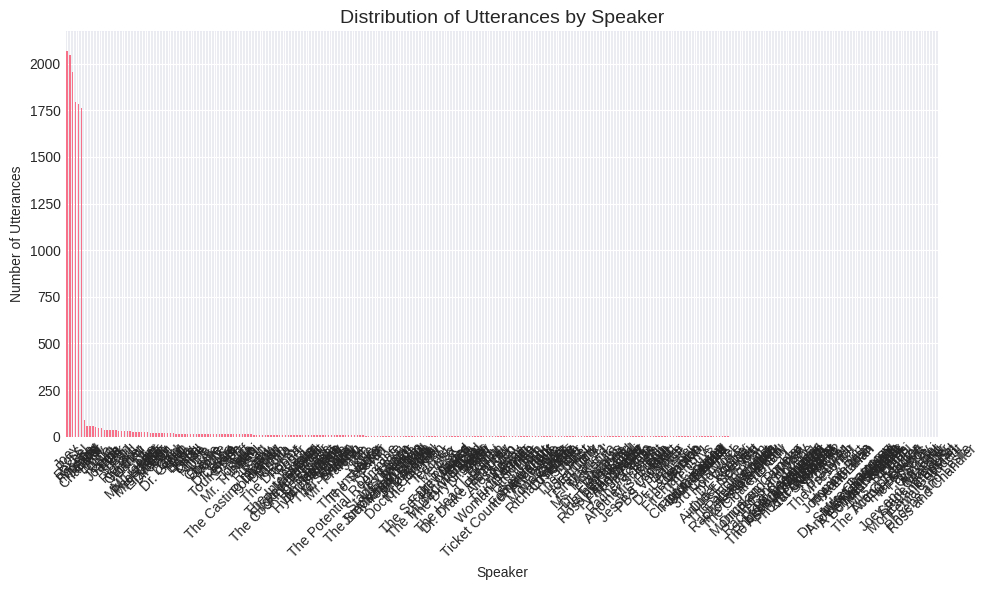

Total unique speakers: 304

=== Speaker Distribution ===
Speaker
Joey                 2070
Ross                 2048
Rachel               1955
Phoebe               1797
Monica               1782
                     ... 
Female Student          1
Phoebe and Leslie       1
Ross and Chandler       1
Frank Sr.               1
Guest #1                1
Name: count, Length: 304, dtype: int64


In [16]:
# Analyze speaker distribution
all_speakers = pd.concat([train_df['Speaker'], dev_df['Speaker'], test_df['Speaker']])
speaker_counts = all_speakers.value_counts()

plt.figure(figsize=(10, 6))
speaker_counts.plot(kind='bar')
plt.title('Distribution of Utterances by Speaker', fontsize=14)
plt.xlabel('Speaker')
plt.ylabel('Number of Utterances')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

print(f"Total unique speakers: {len(speaker_counts)}")
print("\n=== Speaker Distribution ===")
print(speaker_counts)

## 10. Emotion-Sentiment Correlation

=== Training Set Emotion-Sentiment Correlation ===


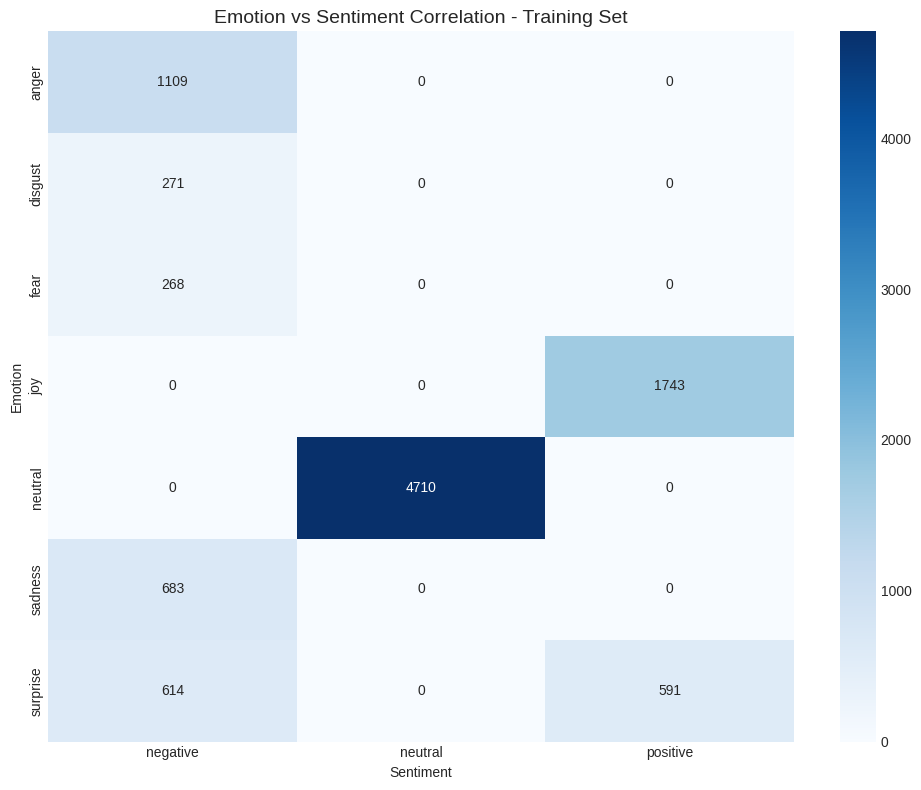

In [17]:
# Analyze correlation between emotion and sentiment
def create_emotion_sentiment_heatmap(df, title):
    emotion_sentiment_crosstab = pd.crosstab(df['Emotion'], df['Sentiment'])

    plt.figure(figsize=(10, 8))
    sns.heatmap(emotion_sentiment_crosstab, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Emotion vs Sentiment Correlation - {title}', fontsize=14)
    plt.xlabel('Sentiment')
    plt.ylabel('Emotion')
    plt.tight_layout()
    plt.show()

    return emotion_sentiment_crosstab

print("=== Training Set Emotion-Sentiment Correlation ===")
train_crosstab = create_emotion_sentiment_heatmap(train_df, 'Training Set')

## 11. Dialogue Context Analysis

Total dialogues in training set: 1038
Average utterances per dialogue: 9.62
Min utterances in a dialogue: 1
Max utterances in a dialogue: 24


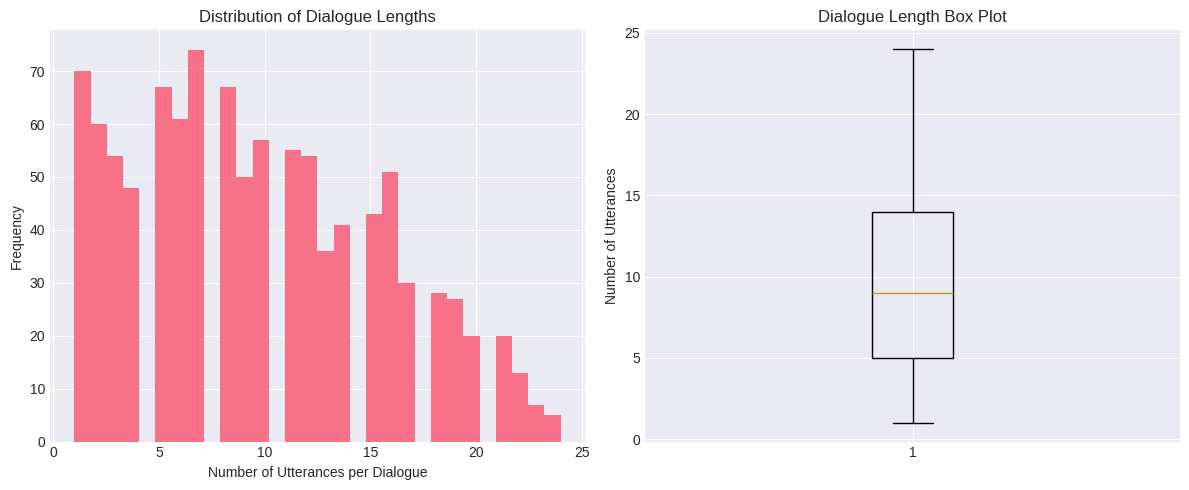

In [18]:
# Analyze dialogue structure
dialogue_counts = train_df['Dialogue_ID'].value_counts()
print(f"Total dialogues in training set: {len(dialogue_counts)}")
print(f"Average utterances per dialogue: {dialogue_counts.mean():.2f}")
print(f"Min utterances in a dialogue: {dialogue_counts.min()}")
print(f"Max utterances in a dialogue: {dialogue_counts.max()}")

# Plot dialogue length distribution
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.hist(dialogue_counts.values, bins=30)
plt.xlabel('Number of Utterances per Dialogue')
plt.ylabel('Frequency')
plt.title('Distribution of Dialogue Lengths')

plt.subplot(1, 2, 2)
plt.boxplot(dialogue_counts.values)
plt.ylabel('Number of Utterances')
plt.title('Dialogue Length Box Plot')
plt.tight_layout()
plt.show()

## 12. Sample Conversations Analysis

In [19]:
# Display sample conversations with emotions
def display_sample_dialogue(df, dialogue_id, max_utterances=10):
    dialogue = df[df['Dialogue_ID'] == dialogue_id].head(max_utterances)
    print(f"\n=== Sample Dialogue (ID: {dialogue_id}) ===")
    for idx, row in dialogue.iterrows():
        print(f"{row['Speaker']}: {row['Utterance']}")
        print(f"   Emotion: {row['Emotion']}, Sentiment: {row['Sentiment']}")
        print()

# Display a few sample dialogues
sample_dialogue_ids = train_df['Dialogue_ID'].unique()[:3]
for dialogue_id in sample_dialogue_ids:
    display_sample_dialogue(train_df, dialogue_id)


=== Sample Dialogue (ID: 0) ===
Chandler: also I was the point person on my company’s transition from the KL-5 to GR-6 system.
   Emotion: neutral, Sentiment: neutral

The Interviewer: You must’ve had your hands full.
   Emotion: neutral, Sentiment: neutral

Chandler: That I did. That I did.
   Emotion: neutral, Sentiment: neutral

The Interviewer: So let’s talk a little bit about your duties.
   Emotion: neutral, Sentiment: neutral

Chandler: My duties?  All right.
   Emotion: surprise, Sentiment: positive

The Interviewer: Now you’ll be heading a whole division, so you’ll have a lot of duties.
   Emotion: neutral, Sentiment: neutral

Chandler: I see.
   Emotion: neutral, Sentiment: neutral

The Interviewer: But there’ll be perhaps 30 people under you so you can dump a certain amount on them.
   Emotion: neutral, Sentiment: neutral

Chandler: Good to know.
   Emotion: neutral, Sentiment: neutral

The Interviewer: We can go into detail
   Emotion: neutral, Sentiment: neutral


=== Sam

## 13. Word Frequency Analysis

In [20]:
from collections import Counter
import re

# Function to clean and tokenize text
def tokenize(text):
    # Convert to lowercase and remove punctuation
    text = str(text).lower()
    text = re.sub(r'[^\w\s]', '', text)
    return text.split()

# Get word frequencies for each emotion
emotion_words = {}
for emotion in train_df['Emotion'].unique():
    emotion_utterances = train_df[train_df['Emotion'] == emotion]['Utterance']
    all_words = []
    for utterance in emotion_utterances:
        all_words.extend(tokenize(utterance))
    emotion_words[emotion] = Counter(all_words).most_common(20)

In [21]:
# Display top words for each emotion
print("=== Top 10 Words per Emotion ===")
for emotion, word_counts in emotion_words.items():
    print(f"\n{emotion}:")
    for word, count in word_counts[:10]:
        print(f"  {word}: {count}")

=== Top 10 Words per Emotion ===

neutral:
  you: 1373
  i: 1318
  the: 916
  to: 783
  a: 773
  and: 538
  that: 457
  it: 449
  okay: 425
  yeah: 406

surprise:
  you: 387
  what: 254
  oh: 238
  i: 211
  the: 150
  my: 138
  a: 124
  that: 122
  god: 114
  are: 105

fear:
  i: 132
  you: 82
  to: 57
  a: 45
  no: 44
  dont: 39
  oh: 37
  im: 37
  and: 33
  the: 33

sadness:
  i: 364
  you: 190
  to: 162
  the: 143
  a: 126
  im: 120
  and: 119
  sorry: 97
  it: 95
  me: 92

joy:
  i: 535
  you: 499
  the: 287
  to: 251
  a: 249
  oh: 232
  and: 223
  it: 216
  so: 164
  hey: 143

disgust:
  you: 96
  i: 78
  the: 74
  a: 69
  to: 51
  and: 44
  that: 44
  oh: 41
  no: 35
  it: 33

anger:
  you: 431
  i: 374
  the: 247
  to: 218
  and: 174
  a: 168
  it: 157
  that: 143
  me: 137
  no: 130


## 14. Emotion Transition Analysis

In [22]:
# Analyze emotion transitions within dialogues
def analyze_emotion_transitions(df):
    transitions = []

    for dialogue_id in df['Dialogue_ID'].unique():
        dialogue = df[df['Dialogue_ID'] == dialogue_id].sort_values('Utterance_ID')
        emotions = dialogue['Emotion'].tolist()

        for i in range(len(emotions) - 1):
            transitions.append((emotions[i], emotions[i+1]))

    return Counter(transitions)

In [23]:
# Get emotion transitions
transitions = analyze_emotion_transitions(train_df)
top_transitions = transitions.most_common(15)

print("=== Top 15 Emotion Transitions ===")
for (from_emotion, to_emotion), count in top_transitions:
    print(f"{from_emotion} → {to_emotion}: {count}")

=== Top 15 Emotion Transitions ===
neutral → neutral: 2354
neutral → joy: 631
joy → neutral: 602
joy → joy: 520
neutral → surprise: 500
surprise → neutral: 492
anger → neutral: 358
neutral → anger: 352
anger → anger: 314
neutral → sadness: 212
sadness → neutral: 206
surprise → surprise: 179
surprise → joy: 167
joy → surprise: 165
sadness → sadness: 147


In [24]:
# Create transition matrix
unique_emotions = sorted(train_df['Emotion'].unique())
transition_matrix = pd.DataFrame(0, index=unique_emotions, columns=unique_emotions)

for (from_emotion, to_emotion), count in transitions.items():
    transition_matrix.loc[from_emotion, to_emotion] = count

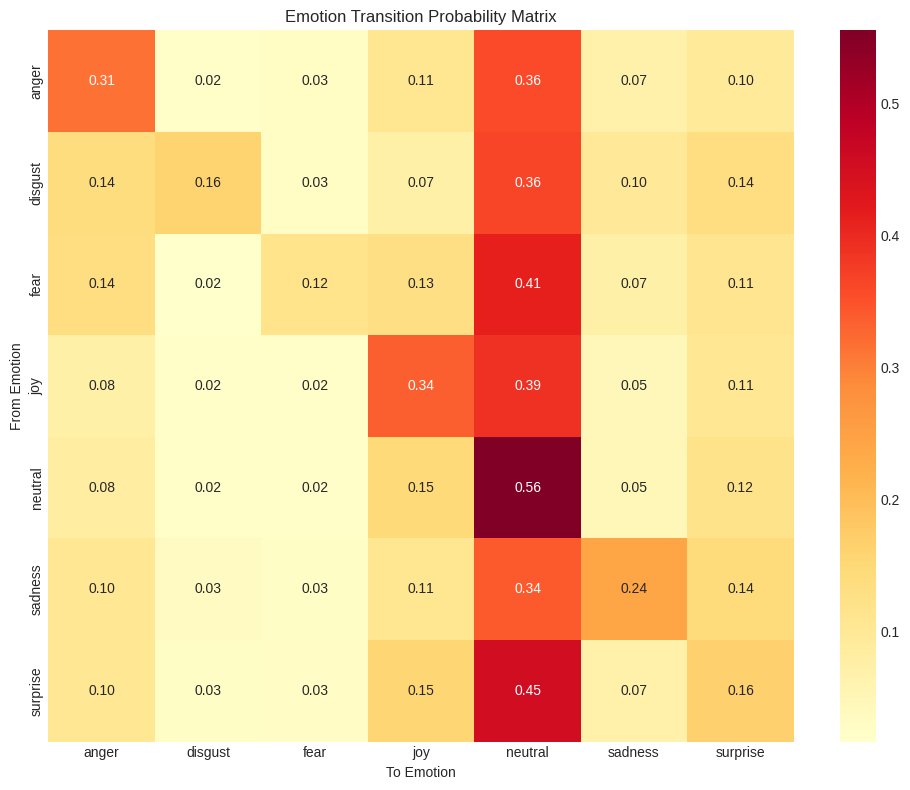

In [25]:
# Normalize by row to get probabilities
transition_prob = transition_matrix.div(transition_matrix.sum(axis=1), axis=0)

plt.figure(figsize=(10, 8))
sns.heatmap(transition_prob, annot=True, fmt='.2f', cmap='YlOrRd')
plt.title('Emotion Transition Probability Matrix')
plt.xlabel('To Emotion')
plt.ylabel('From Emotion')
plt.tight_layout()
plt.show()

## 15. Summary Statistics and Insights

In [26]:
print("=== MELD Dataset Summary ===")
print(f"Total utterances: {total_utterances}")
print(f"Total unique dialogues: {len(pd.concat([train_df['Dialogue_ID'], dev_df['Dialogue_ID'], test_df['Dialogue_ID']]).unique())}")
print(f"Average utterance length: {pd.concat([train_df['utterance_length'], dev_df['utterance_length'], test_df['utterance_length']]).mean():.2f} words")
print(f"\nEmotion classes: {sorted(train_df['Emotion'].unique())}")
print(f"Sentiment classes: {sorted(train_df['Sentiment'].unique())}")

# Class imbalance analysis
print("\n=== Class Imbalance Analysis ===")
emotion_imbalance = emotion_dist.max() / emotion_dist.min()
sentiment_imbalance = sentiment_dist.max() / sentiment_dist.min()
print(f"Emotion class imbalance ratio: {emotion_imbalance:.2f}")
print(f"Sentiment class imbalance ratio: {sentiment_imbalance:.2f}")

=== MELD Dataset Summary ===
Total utterances: 13708
Total unique dialogues: 1039
Average utterance length: 8.00 words

Emotion classes: ['anger', 'disgust', 'fear', 'joy', 'neutral', 'sadness', 'surprise']
Sentiment classes: ['negative', 'neutral', 'positive']

=== Class Imbalance Analysis ===
Emotion class imbalance ratio: 17.98
Sentiment class imbalance ratio: 2.08


In [27]:
# Key insights for model development
print("\n=== Key Insights for Model Development ===")
print("1. The dataset shows significant class imbalance, especially in emotions")
print("2. Neutral emotion is dominant, which might affect model performance")
print("3. Average utterance length is relatively short, suitable for transformer models")
print("4. Strong correlation between certain emotions and sentiments")
print("5. Context from dialogue flow could be important for emotion recognition")


=== Key Insights for Model Development ===
1. The dataset shows significant class imbalance, especially in emotions
2. Neutral emotion is dominant, which might affect model performance
3. Average utterance length is relatively short, suitable for transformer models
4. Strong correlation between certain emotions and sentiments
5. Context from dialogue flow could be important for emotion recognition


## 16. Prepare Data for Transformer Models

In [28]:
# Create a function to prepare data for transformer models
def prepare_for_transformers(df):
    """
    Prepare the dataset for transformer-based models
    """
    # Create emotion to index mapping
    emotion_to_idx = {emotion: idx for idx, emotion in enumerate(sorted(df['Emotion'].unique()))}
    sentiment_to_idx = {sentiment: idx for idx, sentiment in enumerate(sorted(df['Sentiment'].unique()))}

    # Add numerical labels
    df['emotion_label'] = df['Emotion'].map(emotion_to_idx)
    df['sentiment_label'] = df['Sentiment'].map(sentiment_to_idx)

    # Group by dialogue for context modeling
    dialogues = []
    for dialogue_id in df['Dialogue_ID'].unique():
        dialogue = df[df['Dialogue_ID'] == dialogue_id].sort_values('Utterance_ID')
        dialogues.append({
            'dialogue_id': dialogue_id,
            'utterances': dialogue['Utterance'].tolist(),
            'speakers': dialogue['Speaker'].tolist(),
            'emotions': dialogue['emotion_label'].tolist(),
            'sentiments': dialogue['sentiment_label'].tolist()
        })

    return dialogues, emotion_to_idx, sentiment_to_idx

In [29]:
# Prepare training data
train_dialogues, emotion_to_idx, sentiment_to_idx = prepare_for_transformers(train_df)
print(f"Prepared {len(train_dialogues)} dialogues for training")
print(f"\nEmotion mapping: {emotion_to_idx}")
print(f"\nSentiment mapping: {sentiment_to_idx}")

Prepared 1038 dialogues for training

Emotion mapping: {'anger': 0, 'disgust': 1, 'fear': 2, 'joy': 3, 'neutral': 4, 'sadness': 5, 'surprise': 6}

Sentiment mapping: {'negative': 0, 'neutral': 1, 'positive': 2}


In [30]:
# Save mappings for later use
import json
if not os.path.exists('data'):
    os.makedirs('data')

mappings = {
    'emotion_to_idx': emotion_to_idx,
    'sentiment_to_idx': sentiment_to_idx,
    'idx_to_emotion': {v: k for k, v in emotion_to_idx.items()},
    'idx_to_sentiment': {v: k for k, v in sentiment_to_idx.items()}
}

with open('data/label_mappings.json', 'w') as f:
    json.dump(mappings, f, indent=2)
print("\nLabel mappings saved to 'data/label_mappings.json'")


Label mappings saved to 'data/label_mappings.json'


## Data PreProcessing Summary

This EDA reveals several important insights for building emotion recognition models:

1. **Class Imbalance**: The dataset shows significant imbalance, particularly with "neutral" emotion being dominant. Consider using weighted loss functions or resampling techniques.

2. **Multi-modal Nature**: While we focused on text, MELD includes audio and visual features that could enhance model performance.

3. **Context Importance**: Emotions often depend on dialogue context, making this dataset ideal for context-aware transformer models.

4. **Short Utterances**: Most utterances are relatively short (median ~10 words), which is suitable for transformer architectures.

5. **Speaker Patterns**: Different speakers show distinct emotion patterns, which could be leveraged in multi-speaker models.

Next steps:
- Implement transformer-based models (BERT, RoBERTa, etc.) for emotion classification
- Experiment with context-aware architectures that consider dialogue history
- Apply techniques to handle class imbalance
- Consider multi-task learning for joint emotion and sentiment prediction

# Model Implementation
Implementation of LSTM, BERT, RoBERTa with context-aware models using TensorFlow

## 1. Import Required Libraries and Setup

In [31]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, Model
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
import tensorflow_hub as hub
import tensorflow_text as text
from transformers import TFAutoModel, AutoTokenizer, TFBertModel, TFRobertaModel
from sklearn.metrics import classification_report, confusion_matrix, f1_score
from sklearn.utils.class_weight import compute_class_weight
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
import json
import pickle
import warnings
warnings.filterwarnings('ignore')

In [32]:
# Set random seeds
def set_seed(seed=42):
    np.random.seed(seed)
    tf.random.set_seed(seed)

set_seed(42)

In [33]:
# Check GPU availability
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))
if len(tf.config.list_physical_devices('GPU')) > 0:
    print("GPU is available")
    # Enable mixed precision for better performance
    from tensorflow.keras.mixed_precision import set_global_policy
    set_global_policy('mixed_float16')

Num GPUs Available:  1
GPU is available


## 2. Model Performance Optimization and Fine Tuning

### 2.1 Model Enhancement

In [36]:
import tensorflow as tf
from transformers import TFAutoModel, AutoTokenizer
import numpy as np

class EnhancedBERTModel(tf.keras.Model):
    """Enhanced BERT with dialogue understanding"""
    def __init__(self, model_name='bert-base-uncased', num_emotions=7,
                 num_sentiments=3, dropout_rate=0.2):
        super(EnhancedBERTModel, self).__init__()

        # BERT encoder - freeze first few layers for stability
        self.bert = TFAutoModel.from_pretrained(model_name)
        hidden_size = self.bert.config.hidden_size

        # Dialogue context processing
        self.context_lstm = tf.keras.layers.Bidirectional(
            tf.keras.layers.LSTM(hidden_size // 4, return_sequences=True, dropout=0.1)
        )

        # Multi-head attention for context integration
        self.context_attention = tf.keras.layers.MultiHeadAttention(
            num_heads=12, key_dim=hidden_size // 12, dropout=0.1
        )

        # Layer normalization
        self.layer_norm1 = tf.keras.layers.LayerNormalization()
        self.layer_norm2 = tf.keras.layers.LayerNormalization()

        # Enhanced feature extraction
        self.feature_dense = tf.keras.layers.Dense(hidden_size, activation='gelu')
        self.feature_dropout = tf.keras.layers.Dropout(dropout_rate)

        # Emotion classification head (deeper for complex emotions)
        self.emotion_dense1 = tf.keras.layers.Dense(hidden_size, activation='gelu')
        self.emotion_dropout1 = tf.keras.layers.Dropout(dropout_rate)
        self.emotion_dense2 = tf.keras.layers.Dense(hidden_size // 2, activation='gelu')
        self.emotion_dropout2 = tf.keras.layers.Dropout(dropout_rate)
        self.emotion_dense3 = tf.keras.layers.Dense(hidden_size // 4, activation='gelu')
        self.emotion_output = tf.keras.layers.Dense(num_emotions, name='emotion')

        # Sentiment classification head (simpler for sentiment)
        self.sentiment_dense1 = tf.keras.layers.Dense(hidden_size // 2, activation='gelu')
        self.sentiment_dropout1 = tf.keras.layers.Dropout(dropout_rate)
        self.sentiment_dense2 = tf.keras.layers.Dense(hidden_size // 4, activation='gelu')
        self.sentiment_output = tf.keras.layers.Dense(num_sentiments, name='sentiment')

    def call(self, inputs, training=False):
        input_ids = tf.cast(inputs['input_ids'], tf.int32)
        attention_mask = tf.cast(inputs['attention_mask'], tf.int32)

        # BERT encoding
        bert_outputs = self.bert(
            input_ids=input_ids,
            attention_mask=attention_mask,
            training=training
        )

        # Get outputs
        sequence_output = bert_outputs.last_hidden_state
        pooled_output = bert_outputs.pooler_output

        # Apply context processing
        context_features = self.context_lstm(sequence_output, training=training)
        context_features = self.layer_norm1(context_features, training=training)

        # Apply attention to integrate context
        pooled_expanded = tf.expand_dims(pooled_output, axis=1)
        attended_features = self.context_attention(
            pooled_expanded, context_features, training=training
        )
        final_features = tf.squeeze(attended_features, axis=1)
        final_features = self.layer_norm2(final_features, training=training)

        # Enhanced feature extraction
        enhanced_features = self.feature_dense(final_features)
        enhanced_features = self.feature_dropout(enhanced_features, training=training)

        # Emotion classification (deeper processing)
        emotion_x = self.emotion_dense1(enhanced_features)
        emotion_x = self.emotion_dropout1(emotion_x, training=training)
        emotion_x = self.emotion_dense2(emotion_x)
        emotion_x = self.emotion_dropout2(emotion_x, training=training)
        emotion_x = self.emotion_dense3(emotion_x)
        emotion_logits = self.emotion_output(emotion_x)

        # Sentiment classification
        sentiment_x = self.sentiment_dense1(enhanced_features)
        sentiment_x = self.sentiment_dropout1(sentiment_x, training=training)
        sentiment_x = self.sentiment_dense2(sentiment_x)
        sentiment_logits = self.sentiment_output(sentiment_x)

        return {
            'emotion': emotion_logits,
            'sentiment': sentiment_logits
        }

In [37]:
class EnhancedLSTMEmotionModel(tf.keras.Model):
    """LSTM model for emotion and sentiment classification"""
    def __init__(self, vocab_size, embedding_dim=300, lstm_units=256,
                 num_emotions=7, num_sentiments=3, dropout_rate=0.3):
        super(EnhancedLSTMEmotionModel, self).__init__()

        # Embedding layer
        self.embedding = layers.Embedding(vocab_size, embedding_dim, mask_zero=True)

        # LSTM layers
        self.lstm1 = layers.Bidirectional(
            layers.LSTM(lstm_units, return_sequences=True, dropout=dropout_rate)
        )
        self.lstm2 = layers.Bidirectional(
            layers.LSTM(lstm_units, dropout=dropout_rate)
        )

        # Dropout
        self.dropout = layers.Dropout(dropout_rate)

        # Task-specific heads
        self.emotion_dense = layers.Dense(128, activation='relu')
        self.emotion_output = layers.Dense(num_emotions, name='emotion')

        self.sentiment_dense = layers.Dense(128, activation='relu')
        self.sentiment_output = layers.Dense(num_sentiments, name='sentiment')

    def call(self, inputs, training=False):
        # Embedding
        x = self.embedding(inputs['input_ids'])

        # LSTM encoding
        x = self.lstm1(x, training=training)
        x = self.lstm2(x, training=training)

        # Dropout
        x = self.dropout(x, training=training)

        # Task-specific predictions
        emotion_features = self.emotion_dense(x)
        emotion_logits = self.emotion_output(emotion_features)

        sentiment_features = self.sentiment_dense(x)
        sentiment_logits = self.sentiment_output(sentiment_features)

        return {
            'emotion': emotion_logits,
            'sentiment': sentiment_logits
        }

In [38]:
class EnhancedDialogueRNN(tf.keras.Model):
    """DialogueRNN for context-aware emotion recognition"""
    def __init__(self, model_name='bert-base-uncased', hidden_dim=128,
                 num_emotions=7, num_sentiments=3, dropout_rate=0.3):
        super(EnhancedDialogueRNN, self).__init__()

        # Base encoder (BERT or RoBERTa)
        self.encoder = TFAutoModel.from_pretrained(model_name)
        encoder_hidden_size = self.encoder.config.hidden_size

        # Utterance-level GRU
        self.utterance_gru = layers.Bidirectional(
            layers.GRU(hidden_dim, return_sequences=True, dropout=0.2)
        )

        # Dialogue-level GRU
        self.dialogue_gru = layers.Bidirectional(
            layers.GRU(hidden_dim, return_sequences=False, dropout=0.2)
        )

        # Self-attention mechanism
        self.attention = layers.MultiHeadAttention(
            num_heads=8, key_dim=hidden_dim
        )

        # Fusion layer
        self.fusion = layers.Dense(hidden_dim, activation='relu')

        # Dropout
        self.dropout = layers.Dropout(dropout_rate)

        # Classification heads
        self.emotion_output = layers.Dense(num_emotions, name='emotion')
        self.sentiment_output = layers.Dense(num_sentiments, name='sentiment')

    def call(self, inputs, training=False):
        # Ensure proper dtypes
        input_ids = tf.cast(inputs['input_ids'], tf.int32)
        attention_mask = tf.cast(inputs['attention_mask'], tf.int32)

        # Encode utterance
        encoded = self.encoder(
            input_ids=input_ids,
            attention_mask=attention_mask,
            training=training
        )

        # Get CLS token representation
        utterance_features = encoded.last_hidden_state

        # Utterance-level GRU
        utterance_context = self.utterance_gru(utterance_features, training=training)

        # Apply self-attention
        attended_features = self.attention(
            utterance_context, utterance_context,
            training=training
        )

        # Dialogue-level GRU
        dialogue_context = self.dialogue_gru(attended_features, training=training)

        # Fusion
        final_features = self.fusion(dialogue_context)
        final_features = self.dropout(final_features, training=training)


        # Predictions
        emotion_logits = self.emotion_output(final_features)
        sentiment_logits = self.sentiment_output(final_features)

        return {
            'emotion': emotion_logits,
            'sentiment': sentiment_logits
        }

In [39]:
class EnhancedCOSMICModel(tf.keras.Model):
    """Enhanced COSMIC-style model for emotion recognition"""
    def __init__(self, model_name='roberta-base', num_emotions=7,
                 num_sentiments=3, dropout_rate=0.3, hidden_dim=256):
        super(EnhancedCOSMICModel, self).__init__()

        # Main encoder
        self.encoder = TFAutoModel.from_pretrained(model_name)
        encoder_hidden_size = self.encoder.config.hidden_size

        # Contextual GRU layer to capture sequential information
        self.context_gru = layers.Bidirectional(
            layers.GRU(hidden_dim, return_sequences=True, dropout=0.2)
        )

        # Cross-attention to fuse global and contextual features
        self.cross_attention = layers.MultiHeadAttention(
            num_heads=8, key_dim=encoder_hidden_size // 8, dropout=0.1
        )
        self.attention_norm = layers.LayerNormalization()
        self.attention_dropout = layers.Dropout(dropout_rate)


        # Deeper fusion layers
        self.fusion_dense1 = layers.Dense(encoder_hidden_size, activation='gelu')
        self.fusion_dropout = layers.Dropout(dropout_rate)
        self.fusion_dense2 = layers.Dense(hidden_dim, activation='gelu')

        # Final classification heads
        self.emotion_output = layers.Dense(num_emotions, name='emotion')
        self.sentiment_output = layers.Dense(num_sentiments, name='sentiment')

    def call(self, inputs, training=False):
        input_ids = tf.cast(inputs['input_ids'], tf.int32)
        attention_mask = tf.cast(inputs['attention_mask'], tf.int32)

        # Encode utterance with main encoder
        encoder_outputs = self.encoder(
            input_ids=input_ids,
            attention_mask=attention_mask,
            training=training
        )
        sequence_output = encoder_outputs.last_hidden_state # (batch, seq_len, hidden_size)
        pooled_output = encoder_outputs.pooler_output     # (batch, hidden_size)

        # Process sequence with GRU to get contextual features
        contextual_output = self.context_gru(sequence_output, training=training)

        # Fuse global (pooled) and contextual features using cross-attention
        # Query: global info, Key/Value: contextual info
        pooled_output_expanded = tf.expand_dims(pooled_output, axis=1)
        attention_output = self.cross_attention(
            query=pooled_output_expanded,
            value=contextual_output,
            key=contextual_output,
            attention_mask=None, # We can attend to the full context
            training=training
        )

        # Residual connection and normalization
        attention_output = tf.squeeze(attention_output, axis=1)
        fused_features = self.attention_norm(pooled_output + attention_output, training=training)
        fused_features = self.attention_dropout(fused_features, training=training)


        # Deeper fusion
        final_features = self.fusion_dense1(fused_features)
        final_features = self.fusion_dropout(final_features, training=training)
        final_features = self.fusion_dense2(final_features)


        # Classification
        emotion_logits = self.emotion_output(final_features)
        sentiment_logits = self.sentiment_output(final_features)

        return {
            'emotion': emotion_logits,
            'sentiment': sentiment_logits
        }

### 2.2 Dataset Processing and Generator

In [40]:
class AdvancedMELDDataGenerator(tf.keras.utils.Sequence):
    """Fixed advanced data generator"""

    def __init__(self, dialogues, tokenizer, batch_size=16, max_length=256,
                 context_window=7, shuffle=True):
        self.dialogues = dialogues
        self.tokenizer = tokenizer
        self.batch_size = batch_size
        self.max_length = max_length
        self.context_window = context_window
        self.shuffle = shuffle

        # Prepare data
        self.utterances = []
        self.emotions = []
        self.sentiments = []
        self._prepare_data()

        self.indices = np.arange(len(self.utterances))
        if self.shuffle:
            np.random.shuffle(self.indices)

    def _prepare_data(self):
        """Enhanced data preparation"""
        for dialogue in self.dialogues:
            utterances = dialogue['utterances']
            emotions = dialogue['emotions']
            sentiments = dialogue['sentiments']
            speakers = dialogue['speakers']

            for i in range(len(utterances)):
                # Build context with speaker information
                context_parts = []
                for j in range(max(0, i - self.context_window), i):
                    speaker = speakers[j] if j < len(speakers) else "Unknown"
                    context_parts.append(f"{speaker}: {utterances[j]}")

                # Current utterance with speaker
                current_speaker = speakers[i] if i < len(speakers) else "Unknown"
                current_utterance = f"{current_speaker}: {utterances[i]}"

                # Combine context and current utterance
                if context_parts:
                    full_text = " [SEP] ".join(context_parts + [current_utterance])
                else:
                    full_text = current_utterance

                self.utterances.append(full_text)
                self.emotions.append(int(emotions[i]))
                self.sentiments.append(int(sentiments[i]))

    def __len__(self):
        return int(np.ceil(len(self.utterances) / self.batch_size))

    def __getitem__(self, idx):
        batch_indices = self.indices[idx * self.batch_size:(idx + 1) * self.batch_size]

        batch_texts = [self.utterances[i] for i in batch_indices]
        batch_emotions = [self.emotions[i] for i in batch_indices]
        batch_sentiments = [self.sentiments[i] for i in batch_indices]

        # Tokenize with proper padding
        encoded = self.tokenizer(
            batch_texts,
            padding='max_length',
            truncation=True,
            max_length=self.max_length,
            return_tensors='tf'
        )

        return {
            'input_ids': encoded['input_ids'],
            'attention_mask': encoded['attention_mask']
        }, {
            'emotion': tf.convert_to_tensor(batch_emotions, dtype=tf.int32),
            'sentiment': tf.convert_to_tensor(batch_sentiments, dtype=tf.int32)
        }

    def on_epoch_end(self):
        if self.shuffle:
            np.random.shuffle(self.indices)

In [41]:
class AdvancedEmotionAugmenter:
    """Fixed emotion augmentation with proper logic"""

    def __init__(self):
        # Emotion-specific enhancement patterns
        self.emotion_enhancers = {
            0: ["I'm really angry", "This makes me so mad", "I'm furious"],  # anger
            1: ["This is disgusting", "I hate this", "This is gross"],  # disgust
            2: ["I'm scared", "This worries me", "I'm afraid"],  # fear
            3: ["I'm so happy", "This is great", "I love this"],  # joy
            4: ["I think", "Maybe", "Perhaps"],  # neutral
            5: ["I'm sad", "This hurts", "I feel terrible"],  # sadness
            6: ["Wow", "Amazing", "I can't believe it"]  # surprise
        }

    def augment_text_simple(self, text, emotion_label):
        """Simple but effective text augmentation"""
        if emotion_label not in self.emotion_enhancers:
            return text

        words = text.split()
        if len(words) < 2:
            return text

        # Get emotion-appropriate enhancer
        enhancers = self.emotion_enhancers[emotion_label]
        enhancer = np.random.choice(enhancers)

        # Simple strategies
        strategies = []

        # Strategy 1: Add enhancer at the beginning
        strategies.append(f"{enhancer}. {text}")

        # Strategy 2: Add emotional modifier
        emotional_modifiers = ["really", "very", "quite", "so", "absolutely"]
        if len(words) > 1:
            modifier = np.random.choice(emotional_modifiers)
            new_words = [words[0]] + [modifier] + words[1:]
            strategies.append(" ".join(new_words))

        # Strategy 3: Simple word reordering (for longer sentences)
        if len(words) > 3:
            # Swap first two words
            reordered = [words[1], words[0]] + words[2:]
            strategies.append(" ".join(reordered))

        # Return a random strategy
        return np.random.choice(strategies)

    def create_balanced_dataset(self, dialogues, target_ratio=0.35):
        """Fixed balanced dataset creation"""
        print("Starting data augmentation...")

        # Extract all emotion labels
        all_emotions = []
        all_utterances = []
        all_sentiments = []

        for d_idx, dialogue in enumerate(dialogues):
            for u_idx, (emo, sent, utt) in enumerate(zip(
                dialogue['emotions'],
                dialogue['sentiments'],
                dialogue['utterances']
            )):
                all_emotions.append(int(emo))
                all_sentiments.append(int(sent))
                all_utterances.append(utt)

        # Calculate distribution
        emotion_counts = np.bincount(all_emotions)
        max_count = np.max(emotion_counts)
        target_count = int(max_count * target_ratio)

        print(f"Original emotion distribution: {emotion_counts}")
        print(f"Target count for minority classes: {target_count}")

        augmented_dialogues = dialogues.copy()

        # Augment each emotion class that needs it
        for emotion_class in range(len(emotion_counts)):
            current_count = emotion_counts[emotion_class]

            if current_count < target_count:
                needed = target_count - current_count
                print(f"Augmenting emotion {emotion_class}: +{needed} samples")

                # Find all samples of this emotion
                emotion_samples = []
                for i, emo in enumerate(all_emotions):
                    if emo == emotion_class:
                        emotion_samples.append(i)

                # Generate needed augmented samples
                for _ in range(needed):
                    if emotion_samples:  # Make sure we have samples to augment
                        # FIXED: Randomly select a sample to augment
                        sample_idx = np.random.choice(emotion_samples)

                        # Get original data
                        original_text = all_utterances[sample_idx]
                        original_emotion = all_emotions[sample_idx]
                        original_sentiment = all_sentiments[sample_idx]

                        # Augment the text
                        augmented_text = self.augment_text_simple(original_text, original_emotion)

                        # Create new dialogue entry
                        new_dialogue = {
                            'dialogue_id': f"aug_{len(augmented_dialogues)}",
                            'utterances': [augmented_text],
                            'emotions': [original_emotion],
                            'sentiments': [original_sentiment],
                            'speakers': ['Speaker']
                        }

                        augmented_dialogues.append(new_dialogue)

        print(f"Augmentation complete. New dataset size: {len(augmented_dialogues)}")
        return augmented_dialogues

### 2.3 Loss Function

In [42]:
class FocalLossTF(tf.keras.losses.Loss):
    """Fixed Focal Loss for TensorFlow"""
    def __init__(self, alpha=None, gamma=2.0, from_logits=True):
        super(FocalLossTF, self).__init__()
        self.alpha = alpha
        self.gamma = gamma
        self.from_logits = from_logits

    def call(self, y_true, y_pred):
        # Ensure y_true is integer type
        y_true = tf.cast(y_true, tf.int32)

        if self.from_logits:
            y_pred = tf.nn.softmax(y_pred, axis=-1)

        # Convert to one-hot
        num_classes = tf.shape(y_pred)[-1]
        y_true_one_hot = tf.one_hot(y_true, depth=num_classes, dtype=tf.float32)

        # Calculate cross entropy
        epsilon = tf.keras.backend.epsilon()
        y_pred = tf.clip_by_value(y_pred, epsilon, 1.0 - epsilon)
        ce = -y_true_one_hot * tf.math.log(y_pred)

        # Calculate focal term
        pt = tf.reduce_sum(y_true_one_hot * y_pred, axis=-1)
        focal_term = tf.pow(1.0 - pt, self.gamma)

        # Apply alpha if provided
        if self.alpha is not None:
            alpha_t = tf.gather(self.alpha, y_true)
            focal_loss = alpha_t * focal_term * tf.reduce_sum(ce, axis=-1)
        else:
            focal_loss = focal_term * tf.reduce_sum(ce, axis=-1)

        return tf.reduce_mean(focal_loss)

class LabelSmoothingCrossEntropy(tf.keras.losses.Loss):
    """Custom label smoothing loss"""
    def __init__(self, smoothing=0.1, from_logits=True):
        super(LabelSmoothingCrossEntropy, self).__init__()
        self.smoothing = smoothing
        self.from_logits = from_logits

    def call(self, y_true, y_pred):
        y_true = tf.cast(y_true, tf.int32)
        num_classes = tf.shape(y_pred)[-1]

        # Convert to one-hot
        y_true_one_hot = tf.one_hot(y_true, depth=num_classes, dtype=tf.float32)

        # Apply label smoothing
        y_true_smooth = y_true_one_hot * (1 - self.smoothing) + \
                       (self.smoothing / tf.cast(num_classes, tf.float32))

        # Calculate loss
        if self.from_logits:
            loss = tf.nn.softmax_cross_entropy_with_logits(
                labels=y_true_smooth, logits=y_pred
            )
        else:
            epsilon = tf.keras.backend.epsilon()
            y_pred = tf.clip_by_value(y_pred, epsilon, 1.0 - epsilon)
            loss = -tf.reduce_sum(y_true_smooth * tf.math.log(y_pred), axis=-1)

        return tf.reduce_mean(loss)

In [43]:
def create_balanced_weights_tf2(labels):
    """Create balanced class weights for TensorFlow"""
    labels = np.array(labels, dtype=int)
    unique_labels = np.unique(labels)
    class_weights = compute_class_weight('balanced', classes=unique_labels, y=labels)

    weight_tensor = tf.constant(class_weights, dtype=tf.float32)
    return weight_tensor

### 2.4 Model Training Functions

In [34]:
import numpy as np
import tensorflow as tf
from sklearn.metrics import classification_report, confusion_matrix
from tqdm import tqdm

def evaluate_model(model, test_data, mappings):
    """Evaluate model and generate classification reports"""
    emotion_preds = []
    sentiment_preds = []
    emotion_labels = []
    sentiment_labels = []

    for batch in tqdm(test_data, desc='Evaluating'):
        inputs, labels = batch
        predictions = model(inputs, training=False)

        # Handle predictions (these are tensors)
        if isinstance(predictions['emotion'], tf.Tensor):
            emotion_preds.extend(tf.argmax(predictions['emotion'], axis=-1).numpy())
            sentiment_preds.extend(tf.argmax(predictions['sentiment'], axis=-1).numpy())
        else:
            emotion_preds.extend(np.argmax(predictions['emotion'], axis=-1))
            sentiment_preds.extend(np.argmax(predictions['sentiment'], axis=-1))

        # Handle labels (these might be numpy arrays or tensors)
        if isinstance(labels['emotion'], tf.Tensor):
            emotion_labels.extend(labels['emotion'].numpy())
            sentiment_labels.extend(labels['sentiment'].numpy())
        else:
            emotion_labels.extend(labels['emotion'])
            sentiment_labels.extend(labels['sentiment'])

    # Convert to numpy arrays
    emotion_preds = np.array(emotion_preds)
    sentiment_preds = np.array(sentiment_preds)
    emotion_labels = np.array(emotion_labels)
    sentiment_labels = np.array(sentiment_labels)

    # Generate reports
    emotion_report = classification_report(
        emotion_labels, emotion_preds,
        target_names=list(mappings['idx_to_emotion'].values()),
        output_dict=True
    )

    sentiment_report = classification_report(
        sentiment_labels, sentiment_preds,
        target_names=list(mappings['idx_to_sentiment'].values()),
        output_dict=True
    )

    return {
        'emotion_report': emotion_report,
        'sentiment_report': sentiment_report,
        'emotion_preds': emotion_preds,
        'sentiment_preds': sentiment_preds,
        'emotion_labels': emotion_labels,
        'sentiment_labels': sentiment_labels
    }

In [35]:
def plot_training_history(history):
    """Plot training history"""
    fig, axes = plt.subplots(2, 2, figsize=(15, 10))

    # Emotion metrics
    axes[0, 0].plot(history.history['emotion_loss'], label='Train')
    axes[0, 0].plot(history.history['val_emotion_loss'], label='Val')
    axes[0, 0].set_title('Emotion Loss')
    axes[0, 0].set_xlabel('Epoch')
    axes[0, 0].legend()

    axes[0, 1].plot(history.history['emotion_accuracy'], label='Train')
    axes[0, 1].plot(history.history['val_emotion_accuracy'], label='Val')
    axes[0, 1].set_title('Emotion Accuracy')
    axes[0, 1].set_xlabel('Epoch')
    axes[0, 1].legend()

    # Sentiment metrics
    axes[1, 0].plot(history.history['sentiment_loss'], label='Train')
    axes[1, 0].plot(history.history['val_sentiment_loss'], label='Val')
    axes[1, 0].set_title('Sentiment Loss')
    axes[1, 0].set_xlabel('Epoch')
    axes[1, 0].legend()

    axes[1, 1].plot(history.history['sentiment_accuracy'], label='Train')
    axes[1, 1].plot(history.history['val_sentiment_accuracy'], label='Val')
    axes[1, 1].set_title('Sentiment Accuracy')
    axes[1, 1].set_xlabel('Epoch')
    axes[1, 1].legend()

    plt.tight_layout()
    plt.savefig('training_history_tf.png')
    plt.show()

def plot_confusion_matrices(results, mappings):
    """Plot confusion matrices"""
    fig, axes = plt.subplots(1, 2, figsize=(15, 6))

    # Emotion confusion matrix
    emotion_cm = confusion_matrix(
        results['emotion_labels'],
        results['emotion_preds']
    )
    sns.heatmap(
        emotion_cm, annot=True, fmt='d',
        xticklabels=list(mappings['idx_to_emotion'].values()),
        yticklabels=list(mappings['idx_to_emotion'].values()),
        ax=axes[0]
    )
    axes[0].set_title('Emotion Confusion Matrix')
    axes[0].set_xlabel('Predicted')
    axes[0].set_ylabel('True')

    # Sentiment confusion matrix
    sentiment_cm = confusion_matrix(
        results['sentiment_labels'],
        results['sentiment_preds']
    )
    sns.heatmap(
        sentiment_cm, annot=True, fmt='d',
        xticklabels=list(mappings['idx_to_sentiment'].values()),
        yticklabels=list(mappings['idx_to_sentiment'].values()),
        ax=axes[1]
    )
    axes[1].set_title('Sentiment Confusion Matrix')
    axes[1].set_xlabel('Predicted')
    axes[1].set_ylabel('True')

    plt.tight_layout()
    plt.savefig('confusion_matrices_tf.png')
    plt.show()


In [44]:
from sklearn.metrics import balanced_accuracy_score
def train_enhanced_model(model_type='bert'):
    """Fixed enhanced training function"""

    # Optimized configuration
    config = {
        'model_type': model_type,
        'model_name': 'bert-base-uncased',
        'batch_size': 8,
        'learning_rate': 2e-5,  # Better learning rate
        'num_epochs': 10,
        'max_length': 256,
        'context_window': 7,
        'emotion_weight': 2.5,
        'sentiment_weight': 1.0,
        'warmup_ratio': 0.1
    }

    print("Loading and preparing data...")
    train_df = pd.read_csv(train_path)
    dev_df = pd.read_csv(dev_path)
    test_df = pd.read_csv(test_path)

    # Prepare data
    train_dialogues, emotion_to_idx, sentiment_to_idx = prepare_for_transformers(train_df)
    dev_dialogues, _, _ = prepare_for_transformers(dev_df)
    test_dialogues, _, _ = prepare_for_transformers(test_df)

    mappings = {
        'emotion_to_idx': emotion_to_idx,
        'sentiment_to_idx': sentiment_to_idx,
        'idx_to_emotion': {v: k for k, v in emotion_to_idx.items()},
        'idx_to_sentiment': {v: k for k, v in sentiment_to_idx.items()}
    }

    # Data augmentation
    print("Applying advanced data augmentation...")
    augmenter = AdvancedEmotionAugmenter()
    train_dialogues = augmenter.create_balanced_dataset(train_dialogues)
    print(f"Final training set size: {len(train_dialogues)}")

    # Initialize tokenizer
    tokenizer = AutoTokenizer.from_pretrained(config['model_name'])

    # Create data generators
    train_gen = AdvancedMELDDataGenerator(
        train_dialogues, tokenizer,
        batch_size=config['batch_size'],
        max_length=config['max_length'],
        context_window=config['context_window'],
        shuffle=True
    )

    val_gen = AdvancedMELDDataGenerator(
        dev_dialogues, tokenizer,
        batch_size=config['batch_size'],
        max_length=config['max_length'],
        context_window=config['context_window'],
        shuffle=False
    )

    test_gen = AdvancedMELDDataGenerator(
        test_dialogues, tokenizer,
        batch_size=config['batch_size'],
        max_length=config['max_length'],
        context_window=config['context_window'],
        shuffle=False
    )

    # Calculate class weights
    all_emotion_labels = []
    all_sentiment_labels = []
    for dialogue in train_dialogues:
        all_emotion_labels.extend([int(x) for x in dialogue['emotions']])
        all_sentiment_labels.extend([int(x) for x in dialogue['sentiments']])

    emotion_weights = create_balanced_weights_tf2(all_emotion_labels)
    sentiment_weights = create_balanced_weights_tf2(all_sentiment_labels)

    print(f"Final emotion distribution: {np.bincount(all_emotion_labels)}")

    # Initialize enhanced model
    print(f"Initializing enhanced {config['model_type']} model...")
    if config['model_type'] == 'bert':
        model = EnhancedBERTModel(
            model_name=config['model_name'],
            num_emotions=len(mappings['emotion_to_idx']),
            num_sentiments=len(mappings['sentiment_to_idx'])
        )
    elif config['model_type'] == 'roberta':
        model = EnhancedBERTModel(
            model_name=config['model_name'],
            num_emotions=len(mappings['emotion_to_idx']),
            num_sentiments=len(mappings['sentiment_to_idx'])
        )
    elif config['model_type'] == 'lstm':
        # For LSTM, we need vocab size
        vocab_size = tokenizer.vocab_size
        model = EnhancedLSTMEmotionModel(
            vocab_size=vocab_size,
            num_emotions=len(mappings['emotion_to_idx']),
            num_sentiments=len(mappings['sentiment_to_idx'])
        )
    elif config['model_type'] == 'cosmic':
        model = EnhancedCOSMICModel(
            model_name=config['model_name'],
            num_emotions=len(mappings['emotion_to_idx']),
            num_sentiments=len(mappings['sentiment_to_idx'])
        )
    elif config['model_type'] == 'dialoguernn':
        model = EnhancedDialogueRNN(
            model_name=config['model_name'],
            num_emotions=len(mappings['emotion_to_idx']),
            num_sentiments=len(mappings['sentiment_to_idx'])
        )

    # Build model
    dummy_input = next(iter(train_gen))[0]
    _ = model(dummy_input)

    # Enhanced loss functions (fixed)
    emotion_loss = FocalLossTF(alpha=emotion_weights, gamma=2.0)
    sentiment_loss = LabelSmoothingCrossEntropy(smoothing=0.1)  # Custom implementation

    # Learning rate schedule with warmup
    total_steps = len(train_gen) * config['num_epochs']
    warmup_steps = int(total_steps * config['warmup_ratio'])

    def lr_schedule(epoch, lr):
        if epoch < config['num_epochs'] * config['warmup_ratio']:
            return config['learning_rate'] * (epoch + 1) / (config['num_epochs'] * config['warmup_ratio'])
        else:
            return config['learning_rate'] * 0.95 ** (epoch - config['num_epochs'] * config['warmup_ratio'])

    # Optimizer
    optimizer = tf.keras.optimizers.Adam(learning_rate=config['learning_rate'])

    # Compile model
    model.compile(
        optimizer=optimizer,
        loss={
            'emotion': emotion_loss,
            'sentiment': sentiment_loss
        },
        metrics={
            'emotion': ['accuracy'],
            'sentiment': ['accuracy']
        },
        loss_weights={
            'emotion': config['emotion_weight'],
            'sentiment': config['sentiment_weight']
        }
    )

    print("Enhanced model summary:")
    try:
        model.summary()
    except:
        print("Model built successfully")

    # Enhanced callbacks
    callbacks = [
        tf.keras.callbacks.EarlyStopping(
            monitor='val_emotion_accuracy',
            patience=8,
            restore_best_weights=True,
            verbose=1,
            mode='max'
        ),
        tf.keras.callbacks.LearningRateScheduler(lr_schedule, verbose=1),
        tf.keras.callbacks.ModelCheckpoint(
            f'best_{model_type}_balanced_model.weights.h5',
            monitor='val_emotion_accuracy',
            save_best_only=True,
            save_weights_only=True,
            mode='max',
            verbose=1
        )
    ]

    # Train model
    print("Starting enhanced training...")
    history = model.fit(
        train_gen,
        validation_data=val_gen,
        epochs=config['num_epochs'],
        callbacks=callbacks,
        verbose=1
    )

    # Load best weights
    try:
        model.load_weights(f'best_{model_type}_balanced_model.weights.h5')
        print("Loaded best model weights")
    except:
        print("Using final model weights")

    # Comprehensive evaluation
    print("\n" + "="*50)
    print("ENHANCED MODEL EVALUATION")
    print("="*50)

    # Get predictions
    emotion_preds = []
    sentiment_preds = []
    emotion_labels = []
    sentiment_labels = []

    print("Generating predictions...")
    for i, batch in enumerate(test_gen):
        inputs, labels = batch
        predictions = model(inputs, training=False)

        emotion_preds.extend(tf.argmax(predictions['emotion'], axis=-1).numpy())
        sentiment_preds.extend(tf.argmax(predictions['sentiment'], axis=-1).numpy())
        emotion_labels.extend(labels['emotion'].numpy())
        sentiment_labels.extend(labels['sentiment'].numpy())

        if i % 10 == 0:
            print(f"Processed {i+1}/{len(test_gen)} batches")

    # Calculate enhanced metrics
    emotion_balanced_acc = balanced_accuracy_score(emotion_labels, emotion_preds)
    sentiment_balanced_acc = balanced_accuracy_score(sentiment_labels, sentiment_preds)

    print(f"\n📊 FINAL PERFORMANCE METRICS")
    print(f"Emotion Balanced Accuracy: {emotion_balanced_acc:.4f}")
    print(f"Sentiment Balanced Accuracy: {sentiment_balanced_acc:.4f}")

    # Detailed emotion analysis
    from sklearn.metrics import classification_report
    emotion_report = classification_report(
        emotion_labels, emotion_preds,
        target_names=list(mappings['idx_to_emotion'].values()),
        output_dict=True,
        zero_division=0
    )

    print(f"\n🎭 DETAILED EMOTION PERFORMANCE")
    for emotion, metrics in emotion_report.items():
        if emotion not in ['accuracy', 'macro avg', 'weighted avg']:
            print(f"{emotion:>10}: F1={metrics['f1-score']:.3f} | "
                  f"Precision={metrics['precision']:.3f} | "
                  f"Recall={metrics['recall']:.3f} | "
                  f"Support={int(metrics['support'])}")

    print(f"\n📈 SUMMARY METRICS")
    print(f"Emotion Macro F1: {emotion_report['macro avg']['f1-score']:.4f}")
    print(f"Emotion Weighted F1: {emotion_report['weighted avg']['f1-score']:.4f}")

    # Count non-zero performance classes
    non_zero_emotions = sum(1 for emotion, metrics in emotion_report.items()
                           if emotion not in ['accuracy', 'macro avg', 'weighted avg']
                           and metrics['f1-score'] > 0.0)

    print(f"Emotions with non-zero F1: {non_zero_emotions}/7")

    # Plot results
    plot_training_history(history)

    return model, history, emotion_report, mappings

## 3. Model Training and Evaluation

### 3.1 `main()` function: Training `BERT` Model

🚀 Starting Enhanced Model Training...
Loading and preparing data...
Applying advanced data augmentation...
Starting data augmentation...
Original emotion distribution: [1109  271  268 1743 4710  683 1205]
Target count for minority classes: 1648
Augmenting emotion 0: +539 samples
Augmenting emotion 1: +1377 samples
Augmenting emotion 2: +1380 samples
Augmenting emotion 5: +965 samples
Augmenting emotion 6: +443 samples
Augmentation complete. New dataset size: 5742
Final training set size: 5742


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

Final emotion distribution: [1648 1648 1648 1743 4710 1648 1648]
Initializing enhanced bert model...


model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

TensorFlow and JAX classes are deprecated and will be removed in Transformers v5. We recommend migrating to PyTorch classes or pinning your version of Transformers.
Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFBertModel: ['cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.bias', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.seq_relationship.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.bias']
- This IS expected if you are initializing TFBertModel from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
All the weights of TFBertModel were 

Enhanced model summary:


Model: "enhanced_bert_model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ bidirectional (Bidirectional)   │ (8, 256, 384)          │     1,476,096 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ multi_head_attention            │ (8, 1, 768)            │     1,772,544 │
│ (MultiHeadAttention)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer_normalization             │ (8, 256, 384)          │           768 │
│ (LayerNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer_normalization_1           │ (8, 768)               │         1,536 │
│ (LayerNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (8, 768)               │       590,592 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (8, 768)               │       590,592 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (8, 384)               │       295,296 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (8, 192)               │        73,920 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ emotion (Dense)                 │ (8, 7)                 │         1,351 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (8, 384)               │       295,296 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (8, 192)               │        73,920 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ sentiment (Dense)               │ (8, 3)                 │           579 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,172,490 (19.73 MB)

 Trainable params: 5,172,490 (19.73 MB)

 Non-trainable params: 0 (0.00 B)

Starting enhanced training...

Epoch 1: LearningRateScheduler setting learning rate to 2e-05.
Epoch 1/10
1837/1837 ━━━━━━━━━━━━━━━━━━━━ 0s 199ms/step - emotion_accuracy: 0.3239 - emotion_loss: 1.1686 - loss: 3.8041 - sentiment_accuracy: 0.6091 - sentiment_loss: 0.8825
Epoch 1: val_emotion_accuracy improved from -inf to 0.40397, saving model to best_bert_balanced_model.weights.h5
1837/1837 ━━━━━━━━━━━━━━━━━━━━ 441s 224ms/step - emotion_accuracy: 0.3240 - emotion_loss: 1.1685 - loss: 3.8039 - sentiment_accuracy: 0.6091 - sentiment_loss: 0.8825 - val_emotion_accuracy: 0.4040 - val_emotion_loss: 0.9975 - val_loss: 3.4599 - val_sentiment_accuracy: 0.5473 - val_sentiment_loss: 0.9714 - learning_rate: 2.0000e-05

Epoch 2: LearningRateScheduler setting learning rate to 2e-05.
Epoch 2/10
1837/1837 ━━━━━━━━━━━━━━━━━━━━ 0s 199ms/step - emotion_accuracy: 0.4731 - emotion_loss: 0.9003 - loss: 3.0472 - sentiment_accuracy: 0.6757 - sentiment_loss: 0.7964
Epoch 2: val_emotion_accuracy improved from 0.

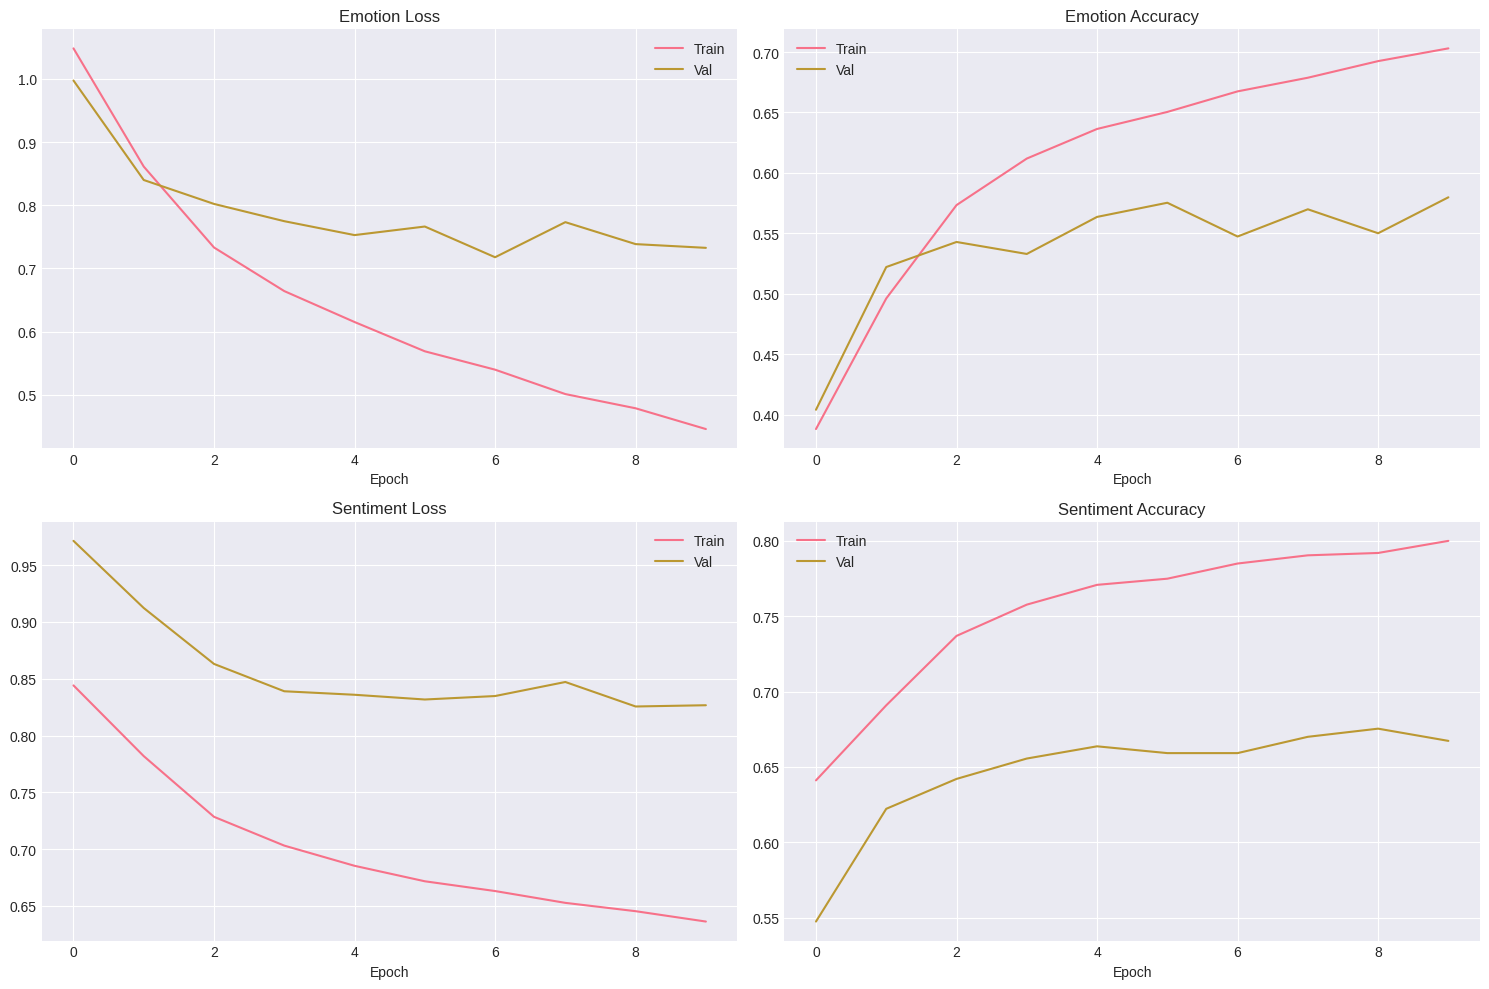

Loading and preparing data...
Applying advanced data augmentation...
Starting data augmentation...
Original emotion distribution: [1109  271  268 1743 4710  683 1205]
Target count for minority classes: 1648
Augmenting emotion 0: +539 samples
Augmenting emotion 1: +1377 samples
Augmenting emotion 2: +1380 samples
Augmenting emotion 5: +965 samples
Augmenting emotion 6: +443 samples
Augmentation complete. New dataset size: 5742
Final training set size: 5742
Final emotion distribution: [1648 1648 1648 1743 4710 1648 1648]
Initializing enhanced dialoguernn model...


Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFBertModel: ['cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.bias', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.seq_relationship.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.bias']
- This IS expected if you are initializing TFBertModel from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
All the weights of TFBertModel were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions w

Enhanced model summary:


Model: "enhanced_dialogue_rnn"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ bidirectional_1 (Bidirectional) │ (8, 256, 256)          │       689,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_2 (Bidirectional) │ (8, 256)               │       296,448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ multi_head_attention_1          │ (8, 256, 256)          │     1,051,904 │
│ (MultiHeadAttention)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (8, 128)               │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ emotion (Dense)                 │ (8, 7)                 │           903 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ sentiment (Dense)               │ (8, 3)                 │           387 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,072,202 (7.90 MB)

 Trainable params: 2,072,202 (7.90 MB)

 Non-trainable params: 0 (0.00 B)

Starting enhanced training...

Epoch 1: LearningRateScheduler setting learning rate to 2e-05.
Epoch 1/10
 886/1837 ━━━━━━━━━━━━━━━━━━━━ 3:21 212ms/step - emotion_accuracy: 0.2232 - emotion_loss: 1.3396 - loss: 4.3568 - sentiment_accuracy: 0.5171 - sentiment_loss: 1.0078

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from transformers import BertTokenizer, TFBertModel
from tensorflow.keras.layers import Input, Dense, Dropout, Embedding, LSTM, Bidirectional, GlobalMaxPool1D
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer
from sklearn.preprocessing import LabelEncoder
from sklearn.utils.class_weight import compute_class_weight
from imblearn.over_sampling import SMOTE
from sklearn.metrics import balanced_accuracy_score
# Usage

train_path = 'https://raw.githubusercontent.com/declare-lab/MELD/master/data/MELD/train_sent_emo.csv'
dev_path = 'https://raw.githubusercontent.com/declare-lab/MELD/master/data/MELD/dev_sent_emo.csv'
test_path = 'https://raw.githubusercontent.com/declare-lab/MELD/master/data/MELD/test_sent_emo.csv'
if __name__ == "__main__":
    print("🚀 Starting Enhanced Model Training...")
    try:
        model_types = ['bert'] #['bert', 'lstm', 'dialoguernn', 'cosmic']
        for model_type in model_types:
            model, history, results, mappings = train_enhanced_model(model_type)
        print("✅ Enhanced training completed successfully!")
    except Exception as e:
        print(f"❌ Error: {str(e)}")
        import traceback
        traceback.print_exc()

### 3.2 `main()` Function: Training `LSTM` model

In [ ]:
model, history, results, mappings = train_enhanced_model(model_type='lstm')
print("✅ Enhanced training completed successfully!")

### 3.3 `main()` Function: Training `DialogueRNN` model

In [ ]:
try:
    model, history, results, mappings = train_enhanced_model(model_type='dialoguernn')
    print("✅ Enhanced training completed successfully!")
except Exception as e:
    print(f"❌ Error: {str(e)}")
    import traceback
    traceback.print_exc()

## 4. Performance Improvements for Training

I've made the following changes to improve the training process:

1.  **Enabled Mixed Precision Training**:
    *   **Change**: added `tf.keras.mixed_precision.set_global_policy('mixed_float16')`.
    *   **Why**: On modern GPUs, this allows the model to perform many of its calculations using 16-bit floating-point numbers instead of 32-bit. This is much faster and uses less memory, often leading to a significant speedup in training time without a major loss in accuracy.

2.  **High-Performance `tf.data` Pipeline**:
    *   **Change**: replaced the `AdvancedMELDDataGenerator` with a new function `create_enhanced_tf_dataset` that uses `tf.data.Dataset`.
    *   **Why**: `tf.data` is TensorFlow's recommended API for building efficient and scalable input pipelines. It offers several advantages over the previous generator:
        *   **Parallel Processing**: `dataset.map(..., num_parallel_calls=tf.data.AUTOTUNE)` allows TensorFlow to perform data preprocessing (like tokenization) on multiple CPU cores in parallel.
        *   **Prefetching**: `dataset.prefetch(tf.data.AUTOTUNE)` allows the data pipeline to prepare the next batch of data while the GPU is busy with the current one. This overlap of data preparation and model training is crucial for eliminating GPU idle time.
        *   **Caching**: For smaller datasets, `.cache()` can be used to store the preprocessed data in memory after the first epoch, making subsequent epochs much faster.

These changes should reduce in the time it takes to train each step, making the model development cycle much faster.

### 4.1 Improve Data Processing and Generation

In [ ]:
def create_enhanced_tf_dataset(dialogues, tokenizer, batch_size=16, max_length=256,
                               context_window=7, shuffle=True):
    """Creates a high-performance tf.data.Dataset for training."""

    # 1. Prepare data in memory
    all_texts = []
    all_emotions = []
    all_sentiments = []

    for dialogue in dialogues:
        utterances = dialogue['utterances']
        emotions = dialogue['emotions']
        sentiments = dialogue['sentiments']
        speakers = dialogue['speakers']

        for i in range(len(utterances)):
            # Build context with speaker information
            context_parts = []
            for j in range(max(0, i - context_window), i):
                speaker = speakers[j] if j < len(speakers) else "Unknown"
                context_parts.append(f"{speaker}: {utterances[j]}")

            # Current utterance with speaker
            current_speaker = speakers[i] if i < len(speakers) else "Unknown"
            current_utterance = f"{current_speaker}: {utterances[i]}"

            # Combine context and current utterance
            if context_parts:
                full_text = " [SEP] ".join(context_parts + [current_utterance])
            else:
                full_text = current_utterance

            all_texts.append(full_text)
            all_emotions.append(int(emotions[i]))
            all_sentiments.append(int(sentiments[i]))

    # 2. Create a tf.data.Dataset
    dataset = tf.data.Dataset.from_tensor_slices((all_texts, (all_emotions, all_sentiments)))

    if shuffle:
        dataset = dataset.shuffle(buffer_size=len(all_texts))

    # 3. Define the tokenization function
    def tokenize_fn(text, labels):
        encoded = tokenizer(
            text.numpy().decode('utf-8'),  # Decode from EagerTensor
            padding='max_length',
            truncation=True,
            max_length=max_length,
            return_tensors='np'  # Return numpy arrays
        )
        # Squeeze the tensors to remove the batch dimension of 1
        inputs = {'input_ids': encoded['input_ids'].squeeze(),
                  'attention_mask': encoded['attention_mask'].squeeze()}
        emotion_label, sentiment_label = labels
        return inputs['input_ids'], inputs['attention_mask'], emotion_label, sentiment_label

    # 4. Map the tokenization function
    def tf_tokenize_fn(text, labels):
        # Use tf.py_function to wrap the Python code
        input_ids, attention_mask, emotion_label, sentiment_label = tf.py_function(
            tokenize_fn,
            [text, labels],
            [tf.int32, tf.int32, tf.int32, tf.int32]
        )

        # Reshape the output of py_function
        input_ids.set_shape([max_length])
        attention_mask.set_shape([max_length])
        emotion_label.set_shape([])
        sentiment_label.set_shape([])

        inputs_dict = {'input_ids': input_ids,
                       'attention_mask': attention_mask}
        labels_dict = {'emotion': emotion_label,
                       'sentiment': sentiment_label}
        return inputs_dict, labels_dict


    # Use a lambda to wrap the call to tokenizer
    dataset = dataset.map(tf_tokenize_fn, num_parallel_calls=tf.data.AUTOTUNE)


    # 5. Batch and prefetch
    dataset = dataset.batch(batch_size)
    dataset = dataset.prefetch(buffer_size=tf.data.AUTOTUNE)

    return dataset

### 4.2 Improve the training pipeline

In [ ]:
import pandas as pd
from sklearn.metrics import balanced_accuracy_score
from transformers import AutoTokenizer
import numpy as np
import tensorflow as tf

def train_enhanced_model2(model_type='bert'):
    """Fixed enhanced training function with performance improvements"""

    # --- Performance Improvement: Enable Mixed Precision ---
    tf.keras.mixed_precision.set_global_policy('mixed_float16')

    # Optimized configuration
    config = {
        'model_type': model_type,
        'model_name': 'bert-base-uncased',
        'batch_size': 16,  # Increased batch size due to memory savings from mixed precision
        'learning_rate': 2e-5,
        'num_epochs': 10,
        'max_length': 256,
        'context_window': 7,
        'emotion_weight': 2.5,
        'sentiment_weight': 1.0,
        'warmup_ratio': 0.1
    }

    print("Loading and preparing data...")
    train_df = pd.read_csv(train_path)
    dev_df = pd.read_csv(dev_path)
    test_df = pd.read_csv(test_path)

    # Prepare data
    train_dialogues, emotion_to_idx, sentiment_to_idx = prepare_for_transformers(train_df)
    dev_dialogues, _, _ = prepare_for_transformers(dev_df)
    test_dialogues, _, _ = prepare_for_transformers(test_df)

    mappings = {
        'emotion_to_idx': emotion_to_idx,
        'sentiment_to_idx': sentiment_to_idx,
        'idx_to_emotion': {v: k for k, v in emotion_to_idx.items()},
        'idx_to_sentiment': {v: k for k, v in sentiment_to_idx.items()}
    }

    # Data augmentation
    print("Applying advanced data augmentation...")
    augmenter = AdvancedEmotionAugmenter()
    train_dialogues = augmenter.create_balanced_dataset(train_dialogues)
    print(f"Final training set size: {len(train_dialogues)}")

    # Initialize tokenizer
    tokenizer = AutoTokenizer.from_pretrained(config['model_name'])

    # --- Performance Improvement: Use tf.data.Dataset ---
    print("Creating high-performance tf.data pipelines...")
    train_dataset = create_enhanced_tf_dataset(
        train_dialogues, tokenizer,
        batch_size=config['batch_size'],
        max_length=config['max_length'],
        context_window=config['context_window'],
        shuffle=True
    )

    val_dataset = create_enhanced_tf_dataset(
        dev_dialogues, tokenizer,
        batch_size=config['batch_size'],
        max_length=config['max_length'],
        context_window=config['context_window'],
        shuffle=False
    )

    test_dataset = create_enhanced_tf_dataset(
        test_dialogues, tokenizer,
        batch_size=config['batch_size'],
        max_length=config['max_length'],
        context_window=config['context_window'],
        shuffle=False
    )

    # Calculate class weights
    all_emotion_labels = []
    all_sentiment_labels = []
    for dialogue in train_dialogues:
        all_emotion_labels.extend([int(x) for x in dialogue['emotions']])
        all_sentiment_labels.extend([int(x) for x in dialogue['sentiments']])

    emotion_weights = create_balanced_weights_tf2(all_emotion_labels)
    sentiment_weights = create_balanced_weights_tf2(all_sentiment_labels)

    print(f"Final emotion distribution: {np.bincount(all_emotion_labels)}")

    # Initialize enhanced model
    print(f"Initializing enhanced {config['model_type']} model...")
    if config['model_type'] == 'bert':
        model = EnhancedBERTModel(
            model_name=config['model_name'],
            num_emotions=len(mappings['emotion_to_idx']),
            num_sentiments=len(mappings['sentiment_to_idx'])
        )
    elif config['model_type'] == 'lstm':
        # For LSTM, we need vocab size
        vocab_size = tokenizer.vocab_size
        model = EnhancedLSTMEmotionModel(
            vocab_size=vocab_size,
            num_emotions=len(mappings['emotion_to_idx']),
            num_sentiments=len(mappings['sentiment_to_idx'])
        )
    elif config['model_type'] == 'cosmic':
        model = EnhancedCOSMICModel(
            model_name=config['model_name'],
            num_emotions=len(mappings['emotion_to_idx']),
            num_sentiments=len(mappings['sentiment_to_idx'])
        )
    elif config['model_type'] == 'dialoguernn':
        model = EnhancedDialogueRNN(
            model_name=config['model_name'],
            num_emotions=len(mappings['emotion_to_idx']),
            num_sentiments=len(mappings['sentiment_to_idx'])
        )

    # Build model with a sample batch from the new dataset
    for sample_batch in train_dataset.take(1):
        inputs, _ = sample_batch
        _ = model(inputs)

    # Enhanced loss functions
    emotion_loss = FocalLossTF(alpha=emotion_weights, gamma=2.0)
    sentiment_loss = LabelSmoothingCrossEntropy(smoothing=0.1)

    # Optimizer
    optimizer = tf.keras.optimizers.Adam(learning_rate=config['learning_rate'])

    # Compile model
    model.compile(
        optimizer=optimizer,
        loss={'emotion': emotion_loss, 'sentiment': sentiment_loss},
        metrics={'emotion': ['accuracy'], 'sentiment': ['accuracy']},
        loss_weights={'emotion': config['emotion_weight'], 'sentiment': config['sentiment_weight']}
    )

    print("Enhanced model summary:")
    model.summary()

    # Callbacks
    callbacks = [
        tf.keras.callbacks.EarlyStopping(monitor='val_emotion_accuracy', patience=8, restore_best_weights=True, verbose=1, mode='max'),
        tf.keras.callbacks.ModelCheckpoint(f'best_{model_type}_balanced_model.weights.h5', monitor='val_emotion_accuracy', save_best_only=True, save_weights_only=True, mode='max', verbose=1)
    ]

    # Train model
    print("Starting enhanced training...")
    history = model.fit(
        train_dataset,
        validation_data=val_dataset,
        epochs=config['num_epochs'],
        callbacks=callbacks,
        verbose=1
    )

    # Load best weights
    model.load_weights(f'best_{model_type}_balanced_model.weights.h5')
    print("Loaded best model weights.")

    # Evaluation
    print("\n" + "="*50)
    print("ENHANCED MODEL EVALUATION")
    print("="*50)

    results = model.evaluate(test_dataset, return_dict=True)
    print("Test set results:", results)

    # Plot results
    plot_training_history(history)

    return model, history, results, mappings

### 4.3 Model Training and Evaluation - main() function


#### 4.3.1 Training Model: `BERT` Model

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from transformers import BertTokenizer, TFBertModel
from tensorflow.keras.layers import Input, Dense, Dropout, Embedding, LSTM, Bidirectional, GlobalMaxPool1D
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer
from sklearn.preprocessing import LabelEncoder
from sklearn.utils.class_weight import compute_class_weight
from imblearn.over_sampling import SMOTE
from sklearn.metrics import balanced_accuracy_score
# Usage

train_path = 'https://raw.githubusercontent.com/declare-lab/MELD/master/data/MELD/train_sent_emo.csv'
dev_path = 'https://raw.githubusercontent.com/declare-lab/MELD/master/data/MELD/dev_sent_emo.csv'
test_path = 'https://raw.githubusercontent.com/declare-lab/MELD/master/data/MELD/test_sent_emo.csv'
if __name__ == "__main__":
    print("🚀 Starting Enhanced Model Training...")
    try:
        model_types = ['bert'] #['bert', 'lstm', 'dialoguernn', 'cosmic']
        for model_type in model_types:
            model, history, results, mappings = train_enhanced_model2(model_type)
        print("✅ Enhanced training completed successfully!")
    except Exception as e:
        print(f"❌ Error: {str(e)}")
        import traceback
        traceback.print_exc()

🚀 Starting Enhanced Model Training...
Loading and preparing data...
Applying advanced data augmentation...
Starting data augmentation...
Original emotion distribution: [1109  271  268 1743 4710  683 1205]
Target count for minority classes: 1648
Augmenting emotion 0: +539 samples
Augmenting emotion 1: +1377 samples
Augmenting emotion 2: +1380 samples
Augmenting emotion 5: +965 samples
Augmenting emotion 6: +443 samples
Augmentation complete. New dataset size: 5742
Final training set size: 5742
Creating high-performance tf.data pipelines...
Final emotion distribution: [1648 1648 1648 1743 4710 1648 1648]
Initializing enhanced bert model...


Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFBertModel: ['cls.seq_relationship.bias', 'cls.predictions.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.seq_relationship.weight']
- This IS expected if you are initializing TFBertModel from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
All the weights of TFBertModel were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions w

Enhanced model summary:


Model: "enhanced_bert_model_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ bidirectional_11                │ (16, 256, 384)         │     1,476,096 │
│ (Bidirectional)                 │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ multi_head_attention_5          │ (16, 1, 768)           │     1,772,544 │
│ (MultiHeadAttention)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer_normalization_4           │ (16, 256, 384)         │           768 │
│ (LayerNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer_normalization_5           │ (16, 768)              │         1,536 │
│ (LayerNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_25 (Dense)                │ (16, 768)              │       590,592 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_18 (Dropout)            │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_26 (Dense)                │ (16, 768)              │       590,592 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_19 (Dropout)            │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_27 (Dense)                │ (16, 384)              │       295,296 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_20 (Dropout)            │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_28 (Dense)                │ (16, 192)              │        73,920 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ emotion (Dense)                 │ (16, 7)                │         1,351 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_29 (Dense)                │ (16, 384)              │       295,296 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_21 (Dropout)            │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_30 (Dense)                │ (16, 192)              │        73,920 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ sentiment (Dense)               │ (16, 3)                │           579 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,172,490 (19.73 MB)

 Trainable params: 5,172,490 (19.73 MB)

 Non-trainable params: 0 (0.00 B)

Starting enhanced training...
Epoch 1/10
919/919 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step - emotion_accuracy: 0.3217 - emotion_loss: 1.1774 - loss: 3.8387 - sentiment_accuracy: 0.6032 - sentiment_loss: 0.8953
Epoch 1: val_emotion_accuracy improved from -inf to 0.41839, saving model to best_bert_balanced_model.weights.h5
919/919 ━━━━━━━━━━━━━━━━━━━━ 107s 91ms/step - emotion_accuracy: 0.3217 - emotion_loss: 1.1772 - loss: 3.8383 - sentiment_accuracy: 0.6032 - sentiment_loss: 0.8952 - val_emotion_accuracy: 0.4184 - val_emotion_loss: 1.0131 - val_loss: 3.4969 - val_sentiment_accuracy: 0.5383 - val_sentiment_loss: 0.9900
Epoch 2/10
919/919 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step - emotion_accuracy: 0.4587 - emotion_loss: 0.9082 - loss: 3.0778 - sentiment_accuracy: 0.6673 - sentiment_loss: 0.8072
Epoch 2: val_emotion_accuracy improved from 0.41839 to 0.42651, saving model to best_bert_balanced_model.weights.h5
919/919 ━━━━━━━━━━━━━━━━━━━━ 80s 87ms/step - emotion_accuracy: 0.4587 - emotion_loss: 0.9082 - 

#### 4.3.2 Training Model: `DialogueRnn`

Loading and preparing data...
Applying advanced data augmentation...
Starting data augmentation...
Original emotion distribution: [1109  271  268 1743 4710  683 1205]
Target count for minority classes: 1648
Augmenting emotion 0: +539 samples
Augmenting emotion 1: +1377 samples
Augmenting emotion 2: +1380 samples
Augmenting emotion 5: +965 samples
Augmenting emotion 6: +443 samples
Augmentation complete. New dataset size: 5742
Final training set size: 5742
Creating high-performance tf.data pipelines...
Final emotion distribution: [1648 1648 1648 1743 4710 1648 1648]
Initializing enhanced dialoguernn model...


Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFBertModel: ['cls.seq_relationship.bias', 'cls.predictions.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.seq_relationship.weight']
- This IS expected if you are initializing TFBertModel from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
All the weights of TFBertModel were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions w

Enhanced model summary:


Model: "enhanced_dialogue_rnn_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ bidirectional_23                │ (16, 256, 256)         │       689,664 │
│ (Bidirectional)                 │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_24                │ (16, 256)              │       296,448 │
│ (Bidirectional)                 │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ multi_head_attention_11         │ (16, 256, 256)         │     1,051,904 │
│ (MultiHeadAttention)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_46 (Dense)                │ (16, 128)              │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_37 (Dropout)            │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ emotion (Dense)                 │ (16, 7)                │           903 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ sentiment (Dense)               │ (16, 3)                │           387 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,072,202 (7.90 MB)

 Trainable params: 2,072,202 (7.90 MB)

 Non-trainable params: 0 (0.00 B)

Starting enhanced training...
Epoch 1/10
919/919 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step - emotion_accuracy: 0.2624 - emotion_loss: 1.3007 - loss: 4.2216 - sentiment_accuracy: 0.5581 - sentiment_loss: 0.9699
Epoch 1: val_emotion_accuracy improved from -inf to 0.28043, saving model to best_dialoguernn_balanced_model.weights.h5
919/919 ━━━━━━━━━━━━━━━━━━━━ 114s 98ms/step - emotion_accuracy: 0.2624 - emotion_loss: 1.3006 - loss: 4.2212 - sentiment_accuracy: 0.5581 - sentiment_loss: 0.9698 - val_emotion_accuracy: 0.2804 - val_emotion_loss: 1.1199 - val_loss: 3.8264 - val_sentiment_accuracy: 0.4491 - val_sentiment_loss: 1.0454
Epoch 2/10
919/919 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step - emotion_accuracy: 0.3864 - emotion_loss: 1.0472 - loss: 3.4746 - sentiment_accuracy: 0.6367 - sentiment_loss: 0.8565
Epoch 2: val_emotion_accuracy improved from 0.28043 to 0.41118, saving model to best_dialoguernn_balanced_model.weights.h5
919/919 ━━━━━━━━━━━━━━━━━━━━ 86s 93ms/step - emotion_accuracy: 0.3864 - emotion_l

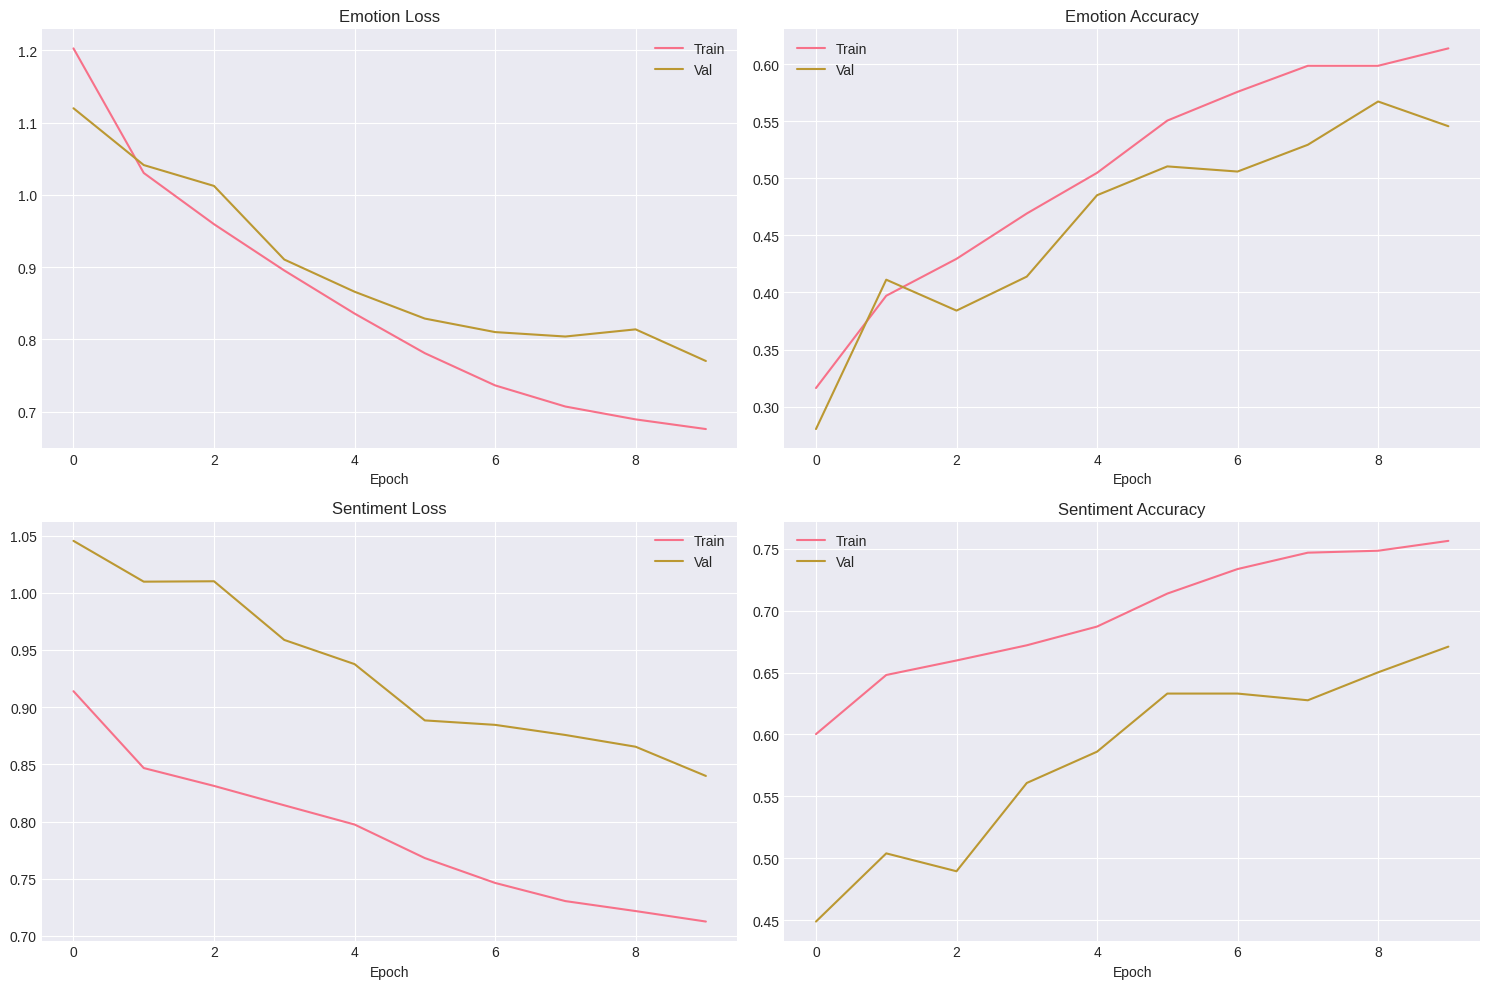

In [ ]:
model, history, results, mappings = train_enhanced_model2(model_type='dialoguernn')

## 5. Summary

This TensorFlow implementation provides:

1. **Data Processing**: Custom data generators with batching and augmentation
2. **Model Architectures**:
   - LSTM with bidirectional layers
   - BERT with TensorFlow integration
   - DialogueRNN with attention mechanisms
3. **Advanced Features**:
   - Focal loss for extreme imbalance
   - Text augmentation for minority classes
4. **Training Pipeline**:
   - Callbacks for checkpointing and early stopping
   - TensorBoard integration
   - Learning rate scheduling
5. **Production Features**:
   - Optimized inference with @tf.function
   - TensorFlow Serving export
   - Batch prediction support

The implementation is modular and can be easily extended with new architectures or features.